# Simulation

推定地が実際のデータをうまく再現できるかをチェックする

simulationの対象はmunicipality別の、候補者ごとの得票率

実際のデータではdataの3~6行が候補者別のvote数（clark, dean, edwards, kerryの順番）

データの見せ方は以下の3つ
- 州ごとにmunicipalityを候補者二人の得票率を軸とした六つの散布図にプロットする
- 州ごとにmunicipalityの結果を集計し、時系列データとして候補者ごとの得票率をプロットする
- 州ごとにmunicipalityを、縦軸を候補者を合算した投票率とした散布図にプロットする。玉の大きさで別の指標も観れるようにする。プロットするのは、「横軸を白人/非白人比率、玉の大きさをkerryの得票率」、「横軸をoverba/それ以外の比率、玉の大きさをkerryの得票率」、「横軸を20000以下、玉の大きさをkerryの得票率」の3種類で、それぞれ7,5の35プロットを一枚の画像にする。

ひとまず実際のデータを上のようにプロットする

In [12]:
using Optim
using StatsFuns
using DataFrames
using Gadfly
using PyPlot

# inverse beta distribution function を行列に対応するように拡張
import StatsFuns.betainvcdf
betainvcdf(alpha::Number, beta::Number, x::Array) = reshape([betainvcdf(alpha, beta, i) for i in reshape(x, 1, size(x, 1)*size(x, 2)) ], size(x, 1), size(x, 2))

# maxをArray{String, 1}に対応するように拡張
# しかしArray型で入っているのでAnyに対応させる
import Base.max
max(number::Real, comparison::Any) = [max(number, parse(Int, i)) for i in comparison] 

# normpdfを配列に拡張
import StatsFuns.normpdf
normpdf(array::Array{Float64, 2}) = reshape([normpdf(i) for i in reshape(array, 1, size(array, 1)*size(array, 2))], size(array, 1), size(array, 2))

# Candを作る
include("bayes.jl");

## 一つ目

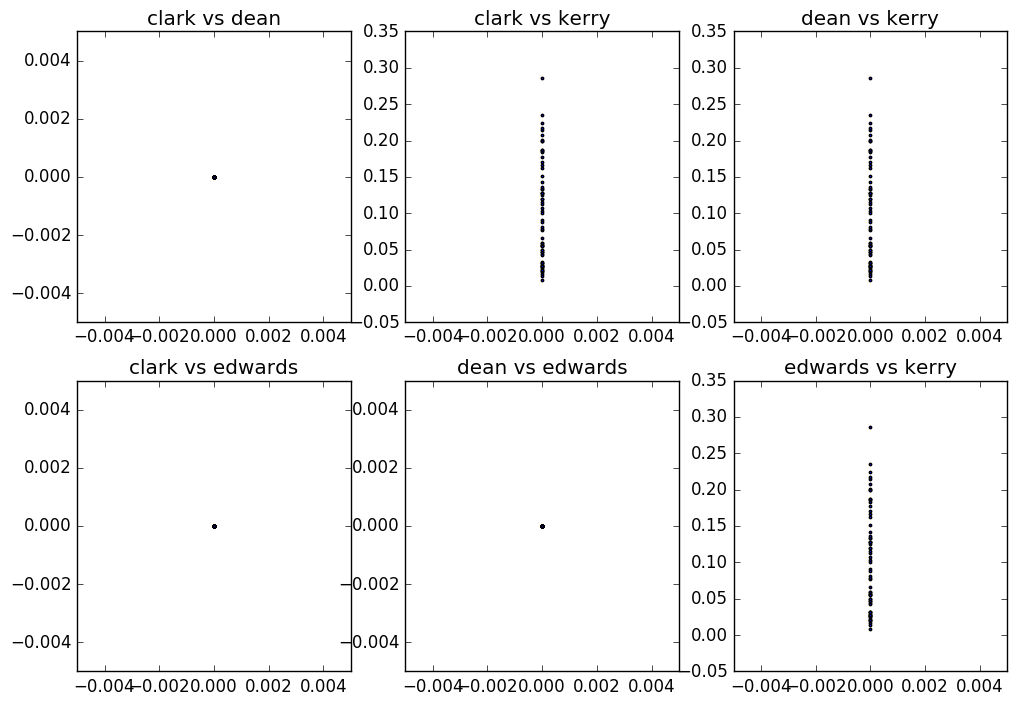

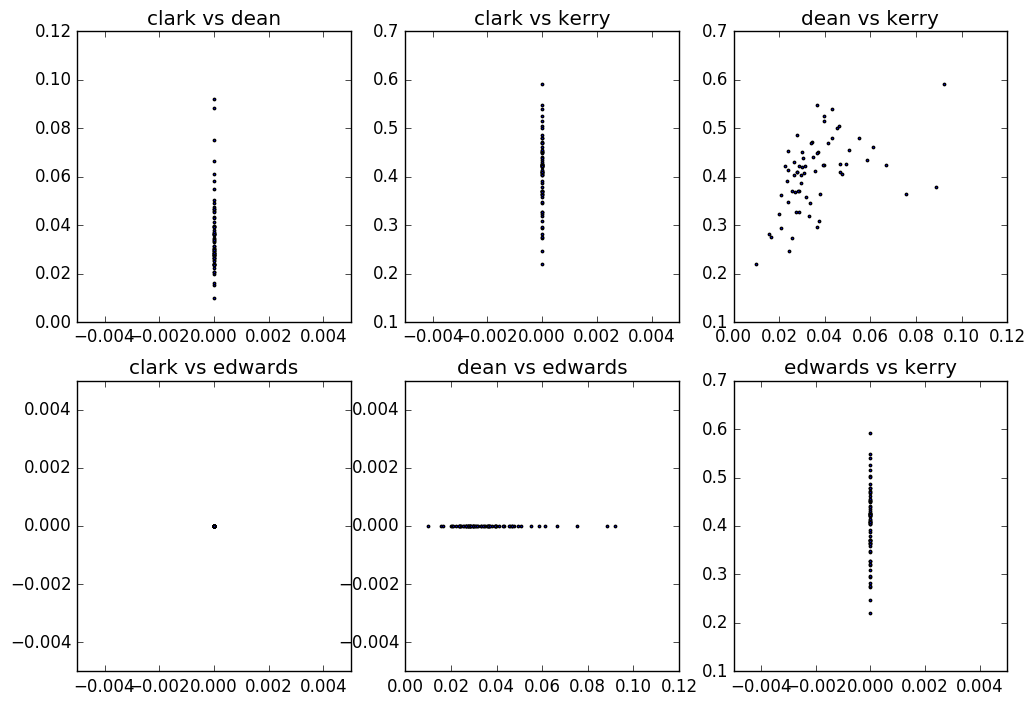

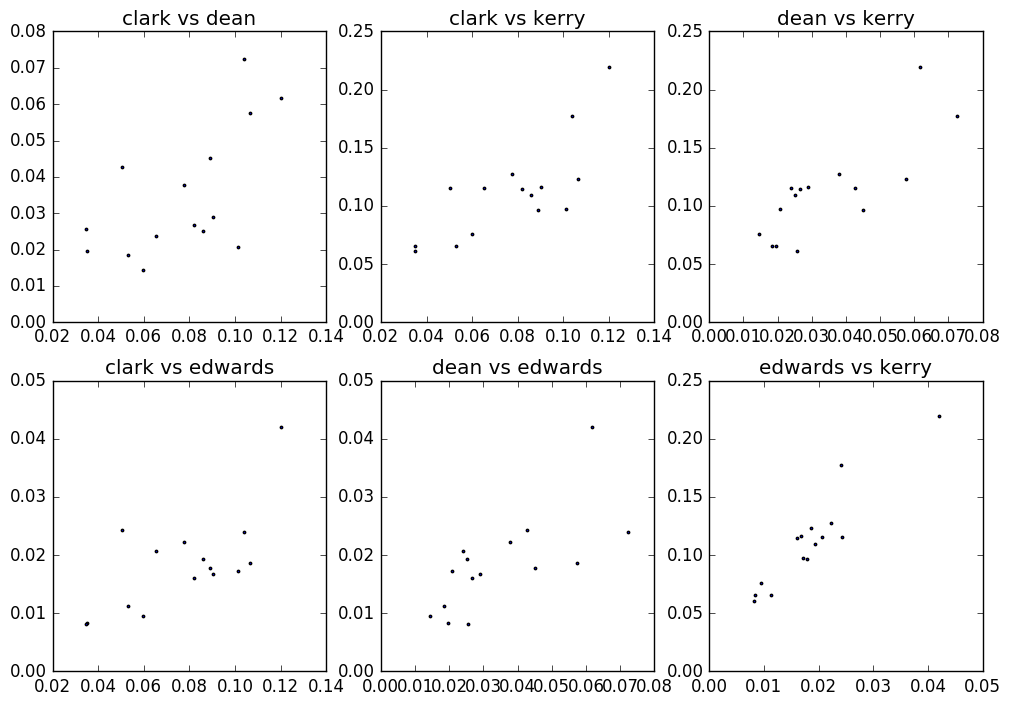

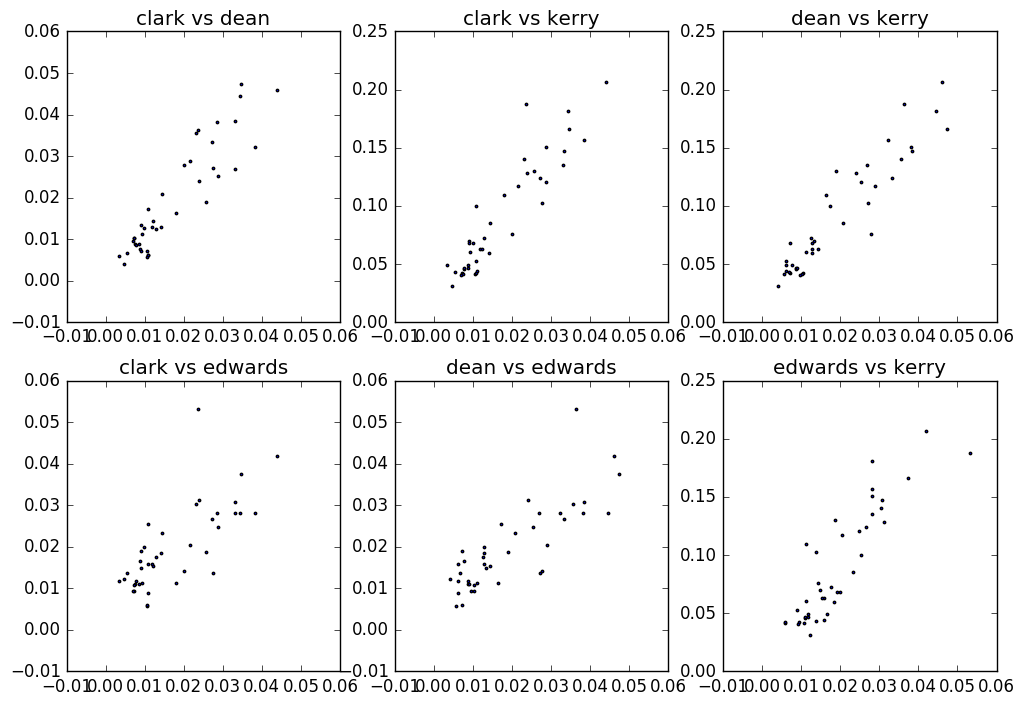

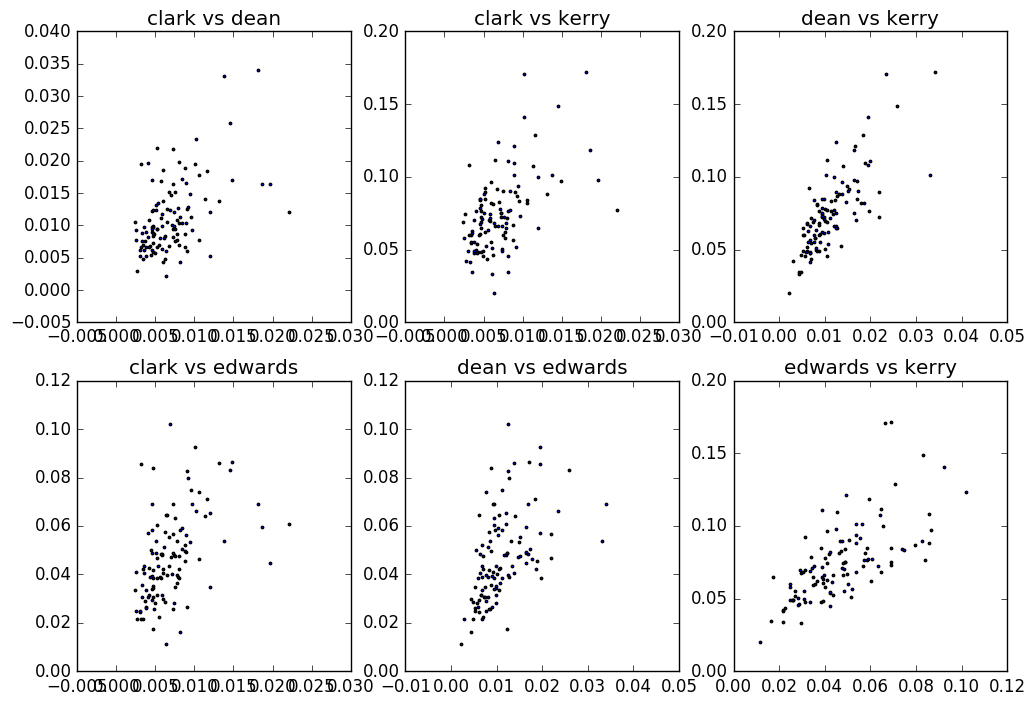

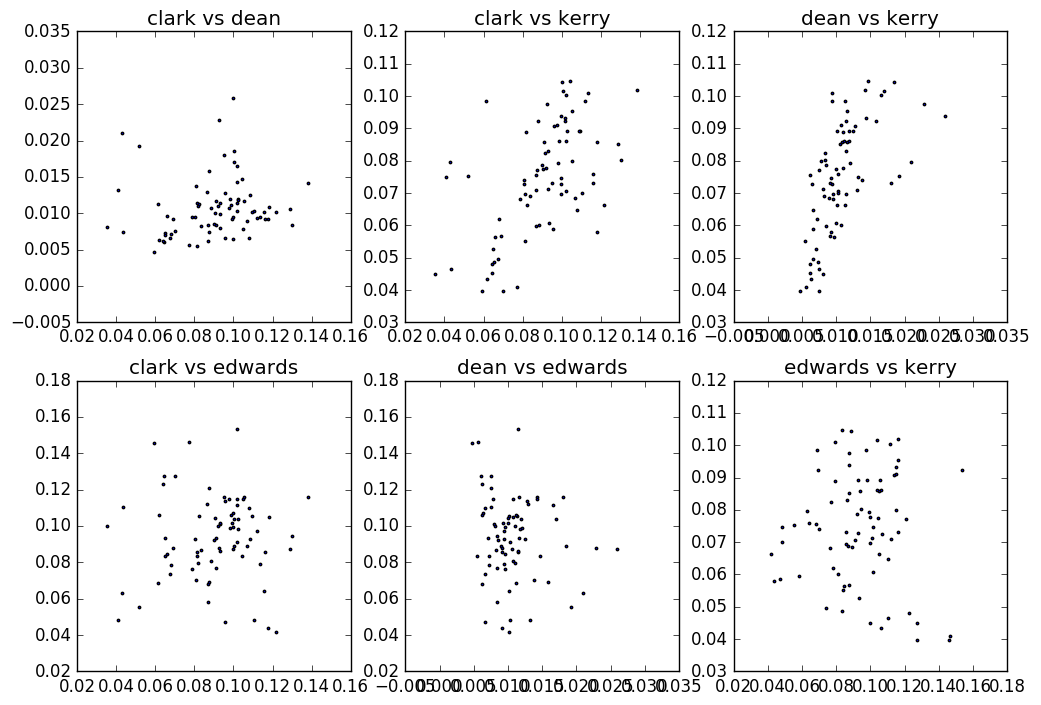

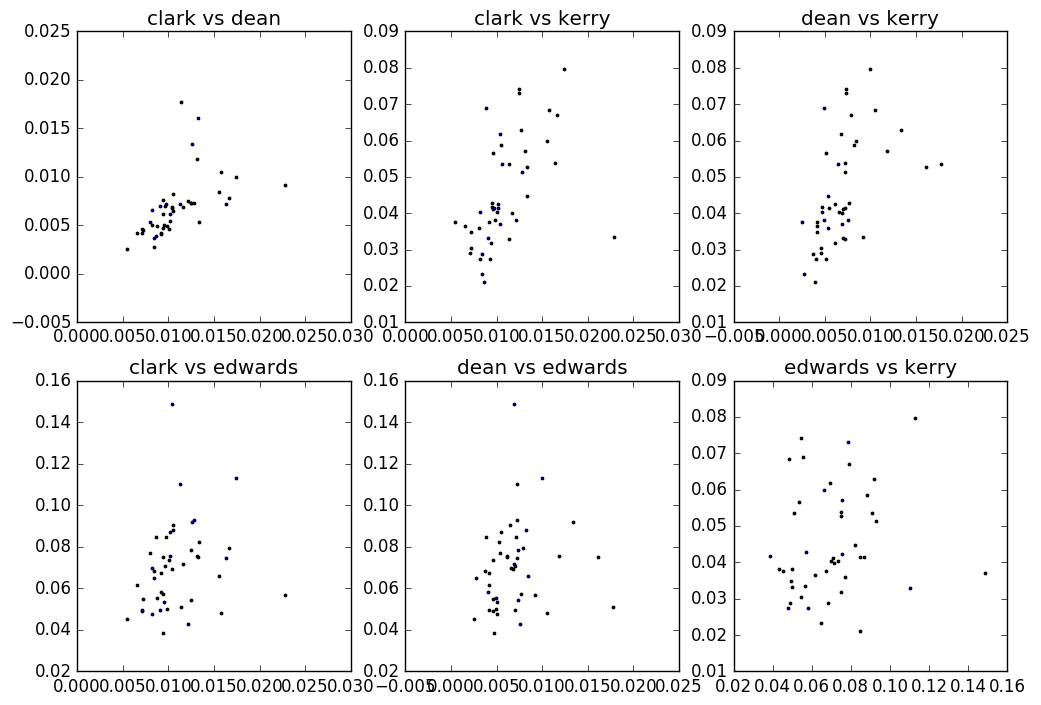

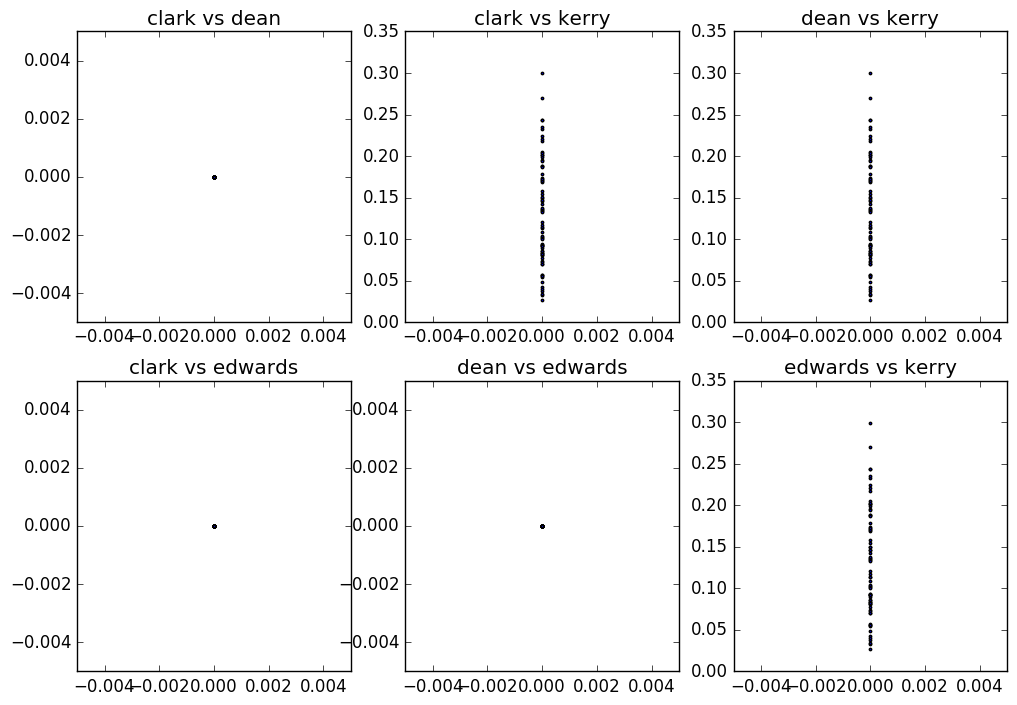

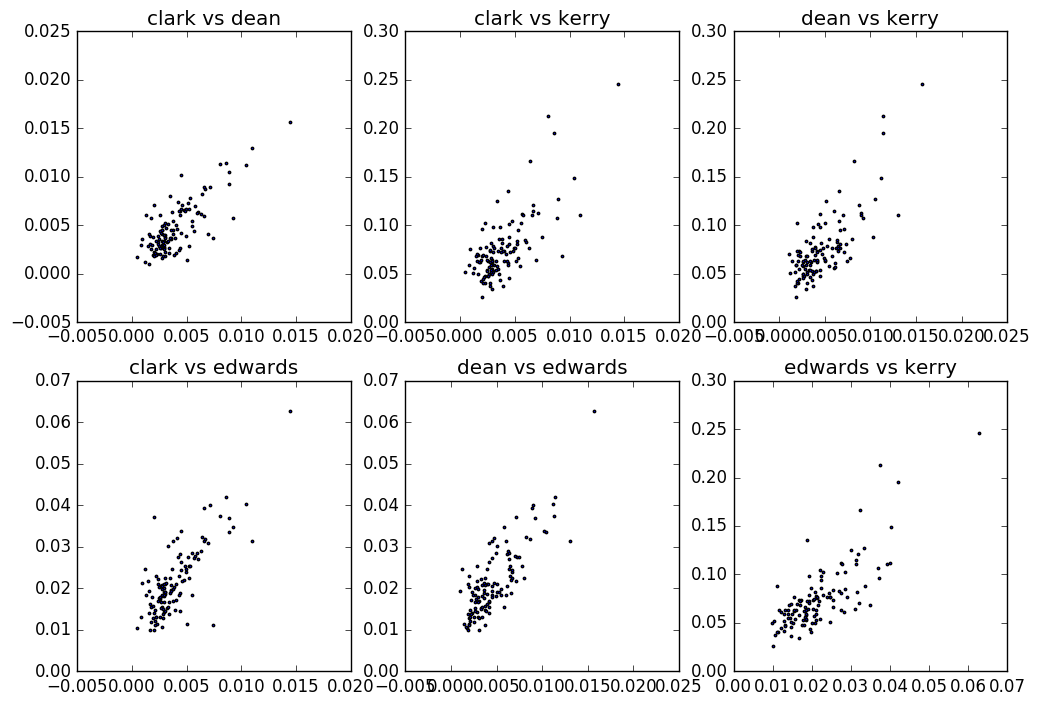

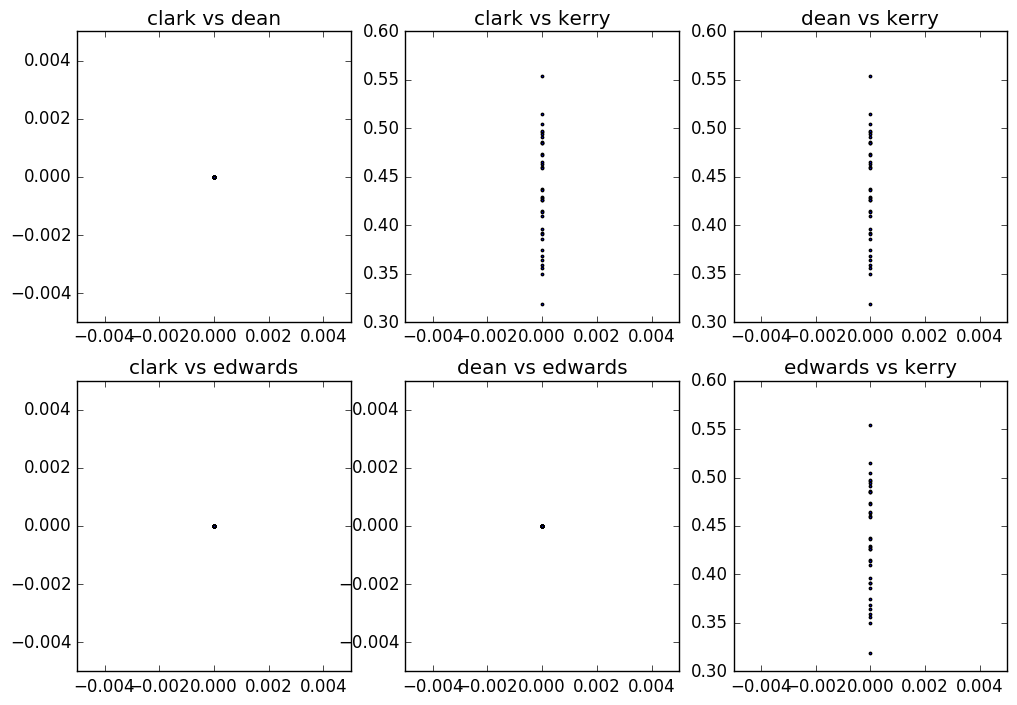

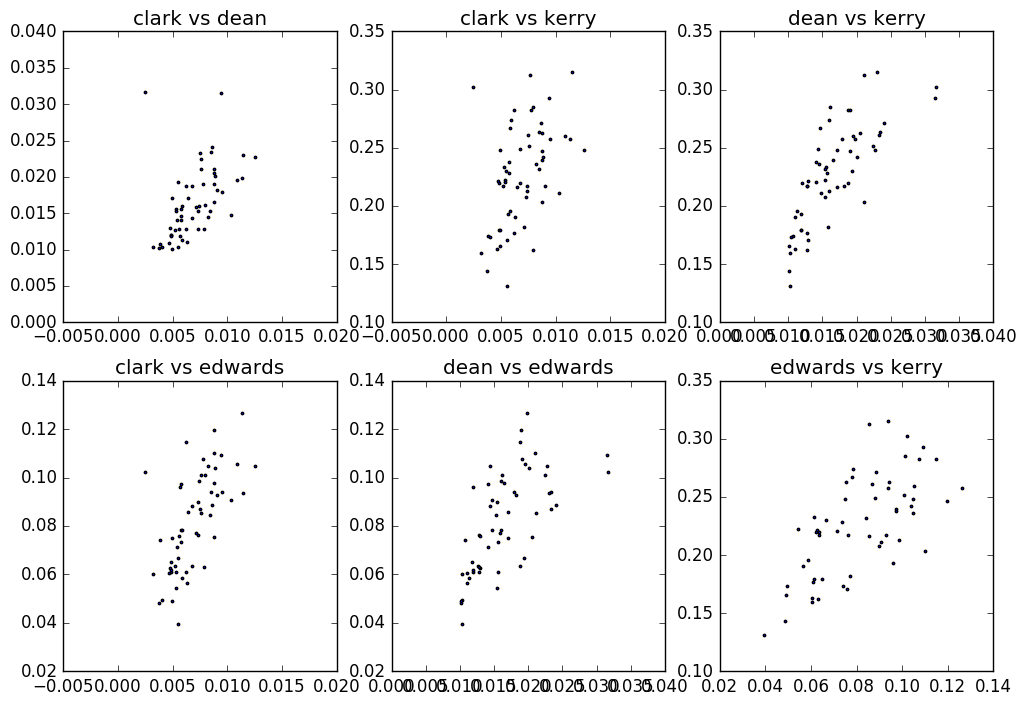

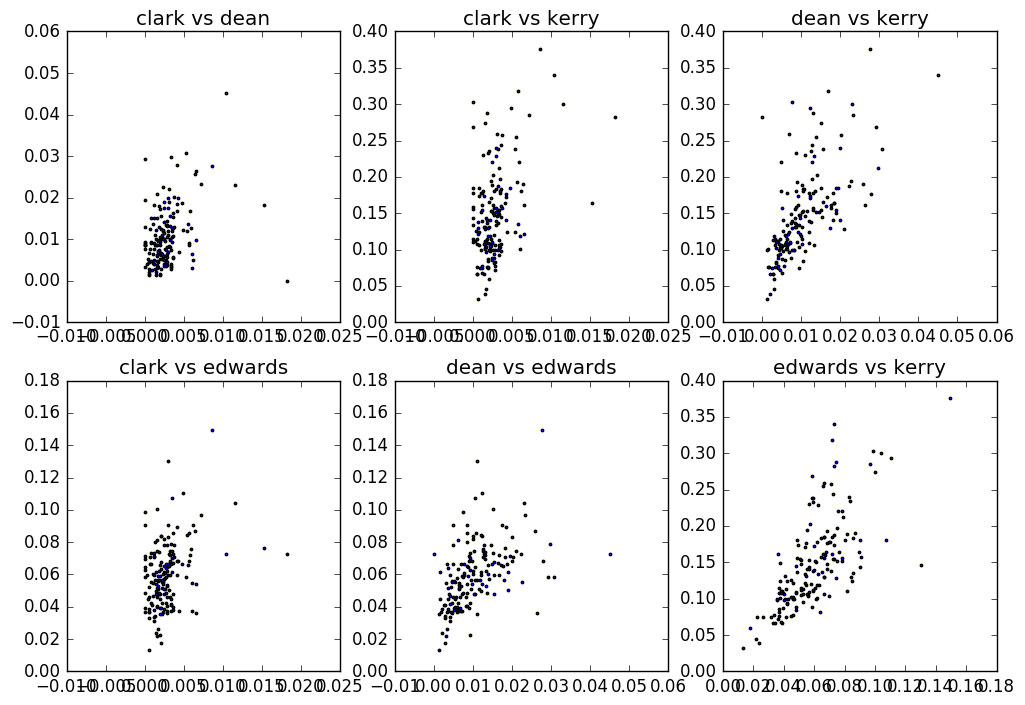

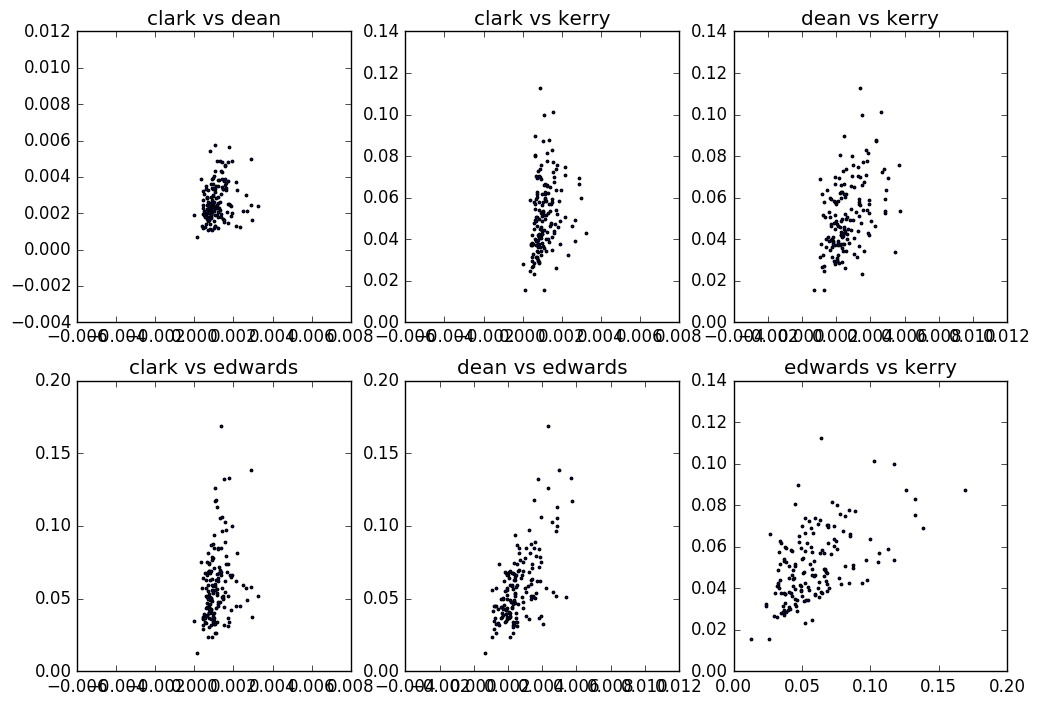

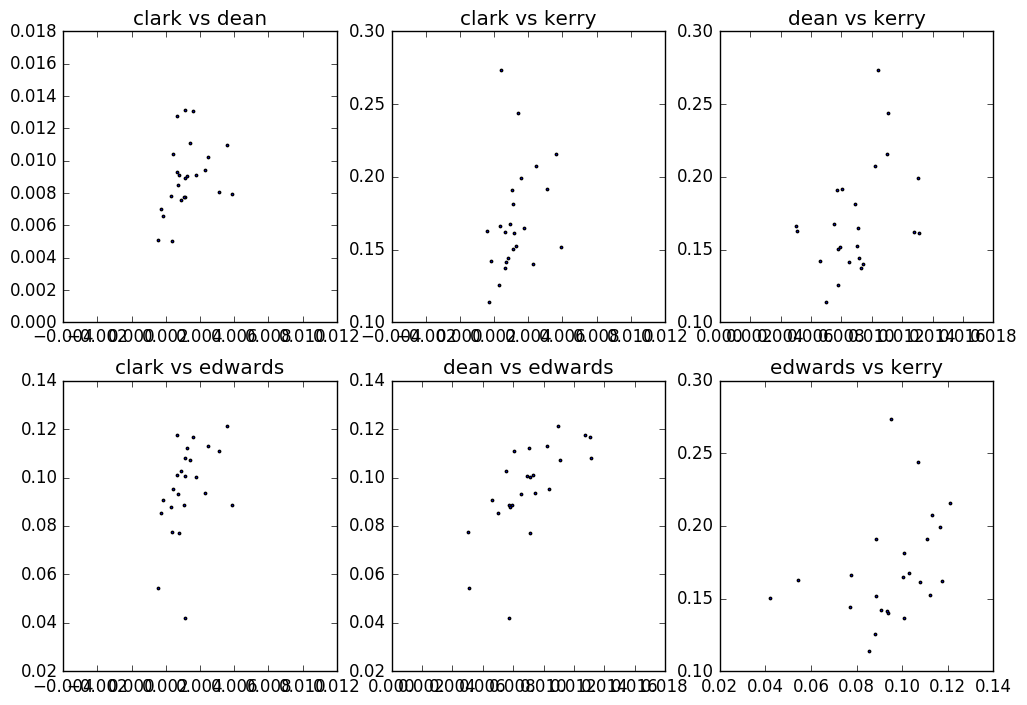

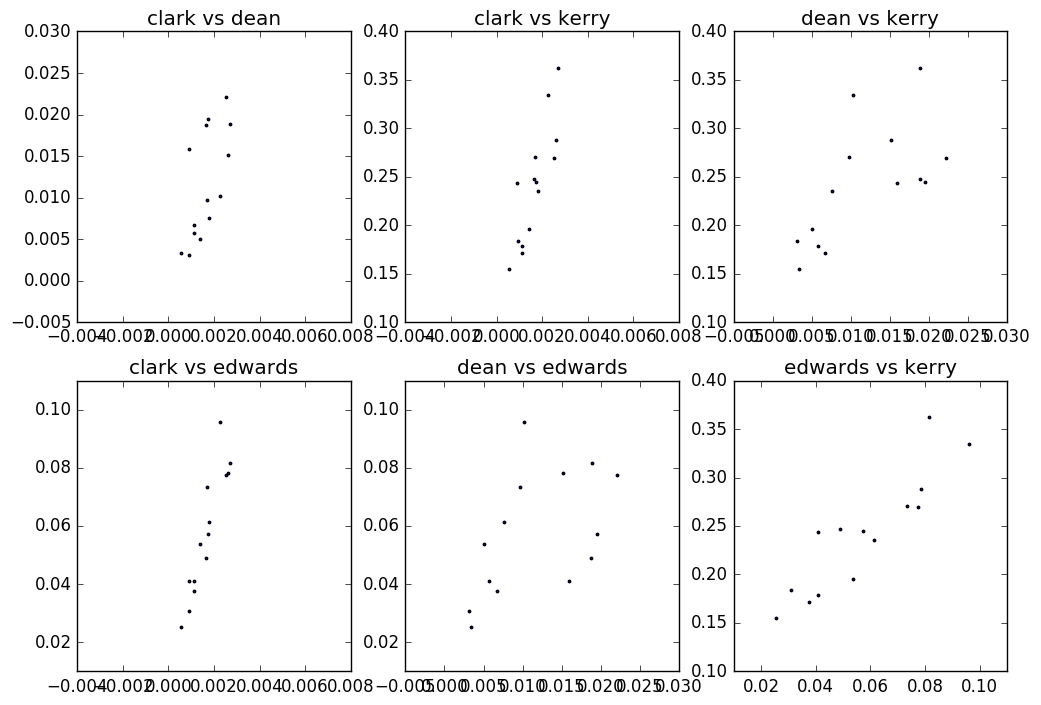

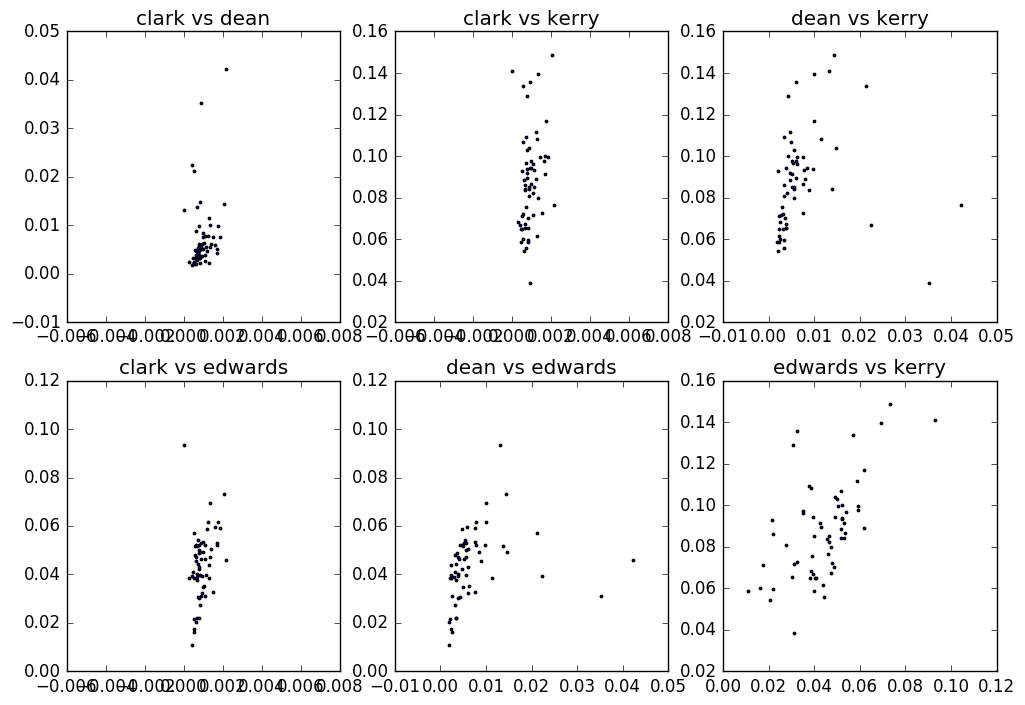

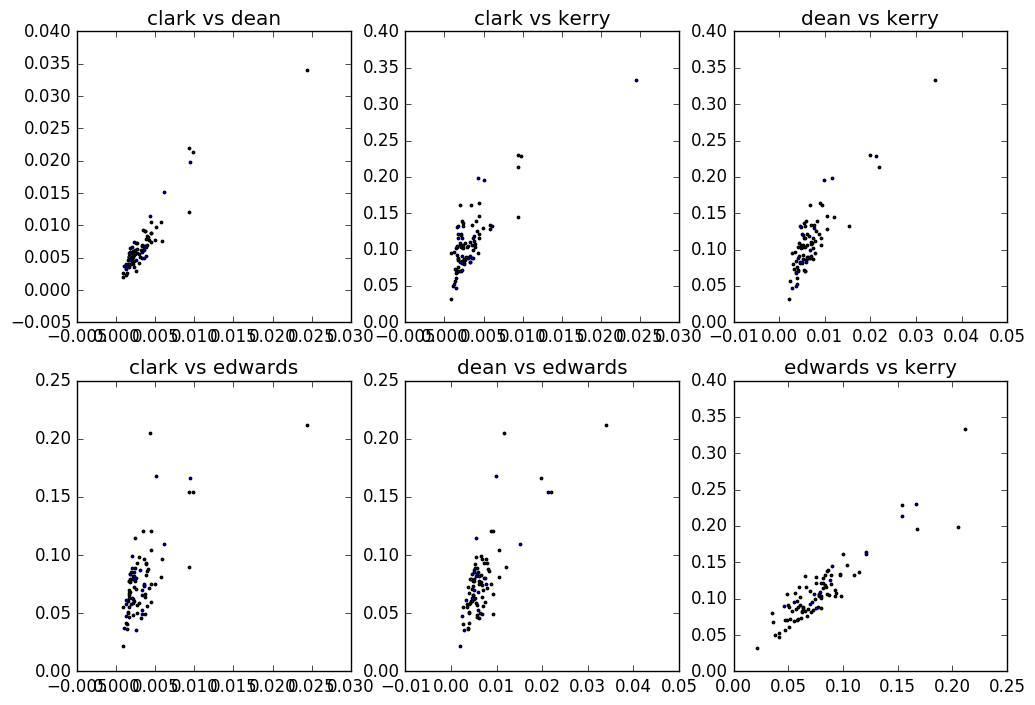

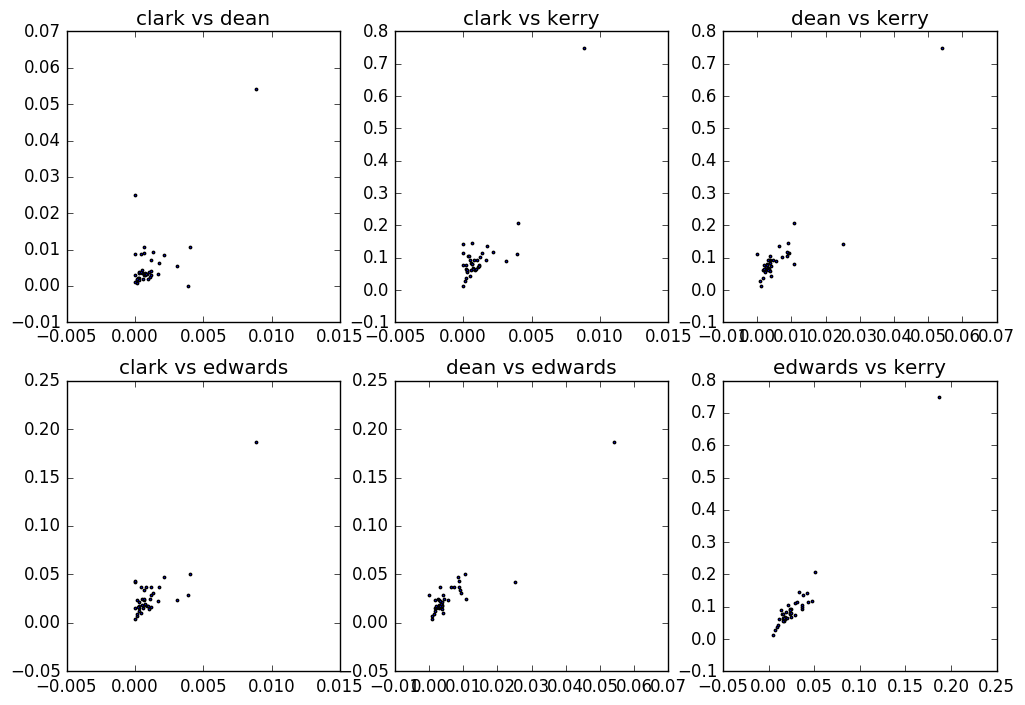

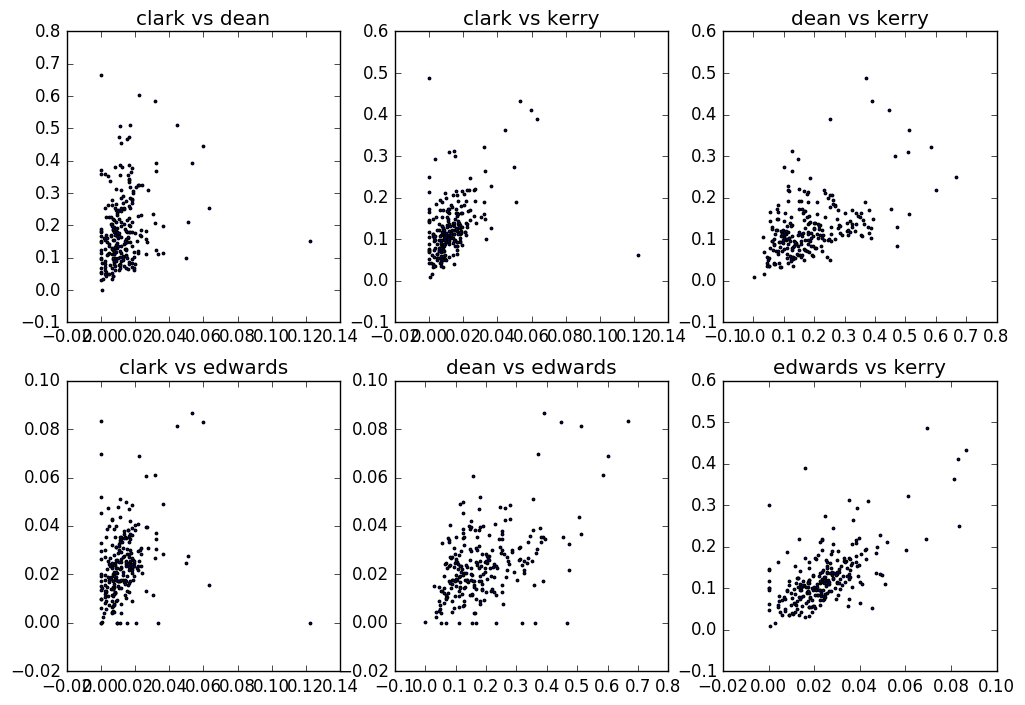

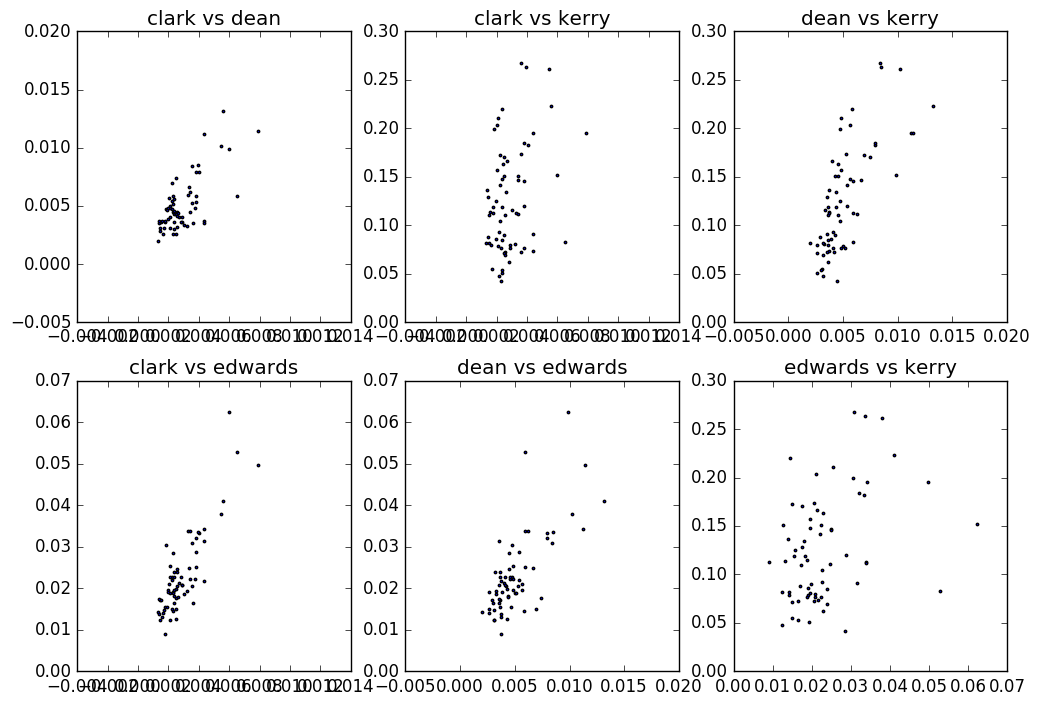

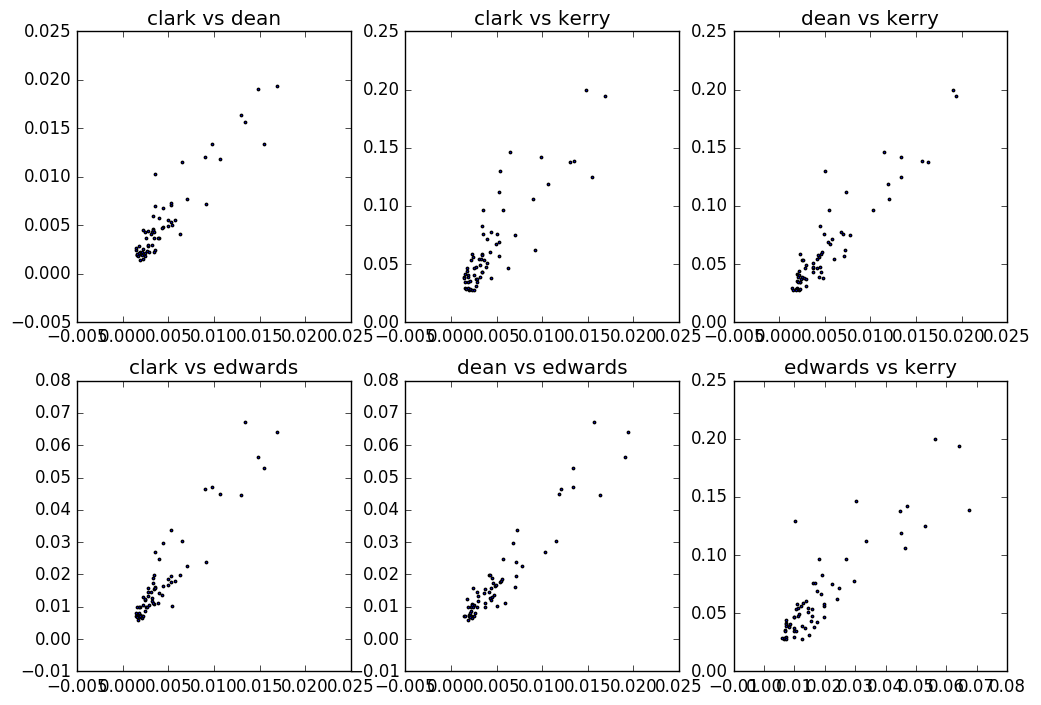

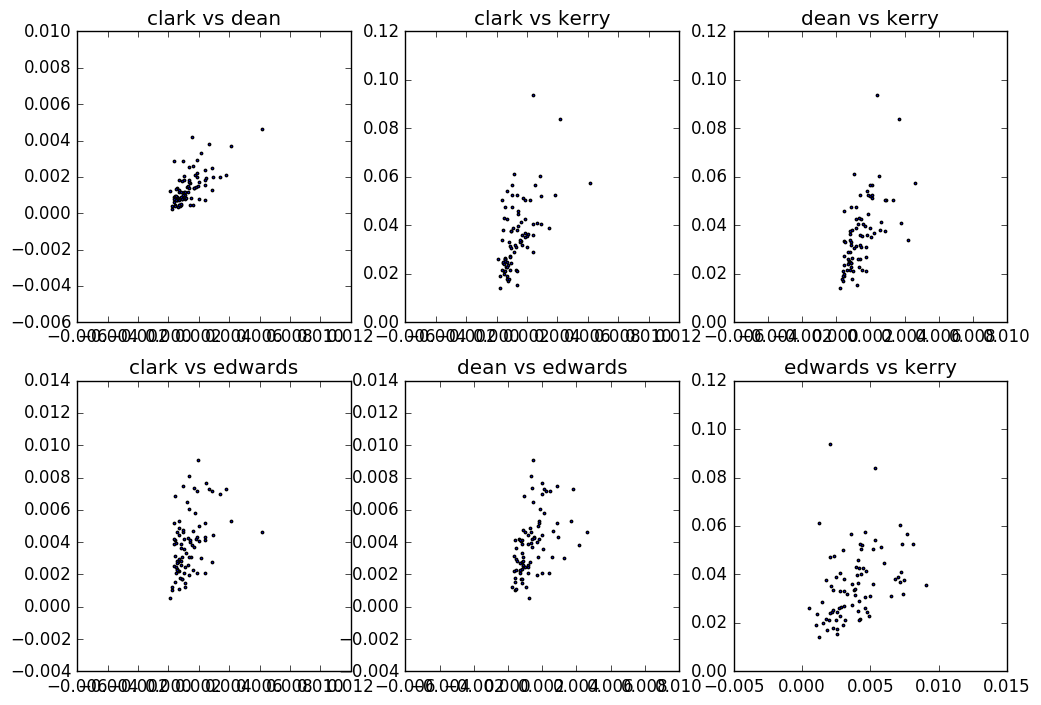

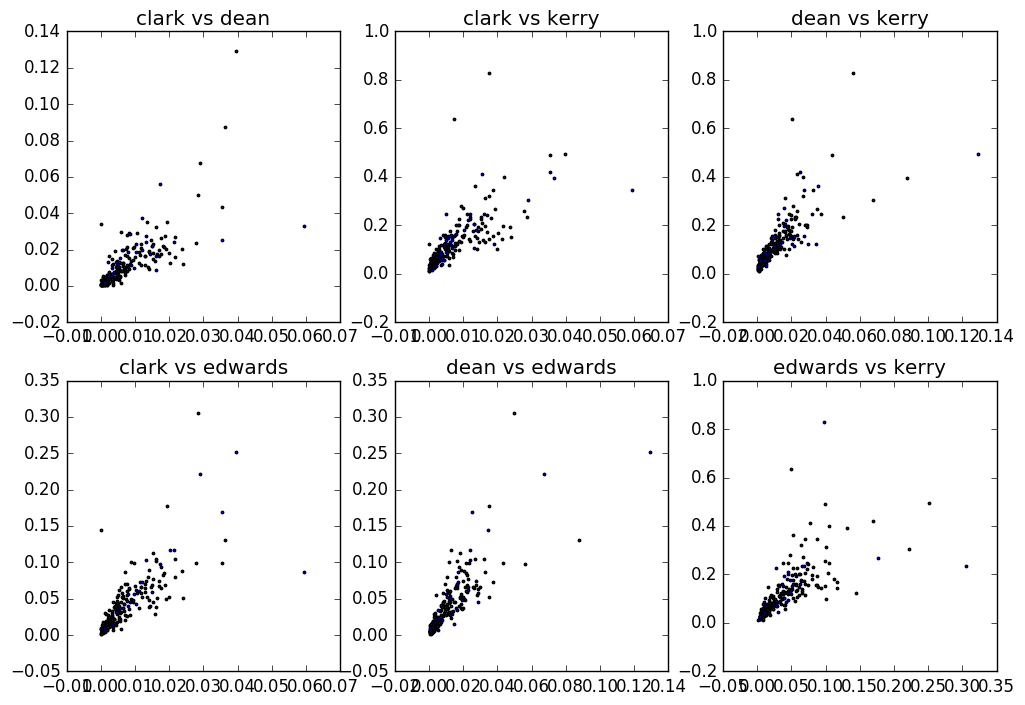

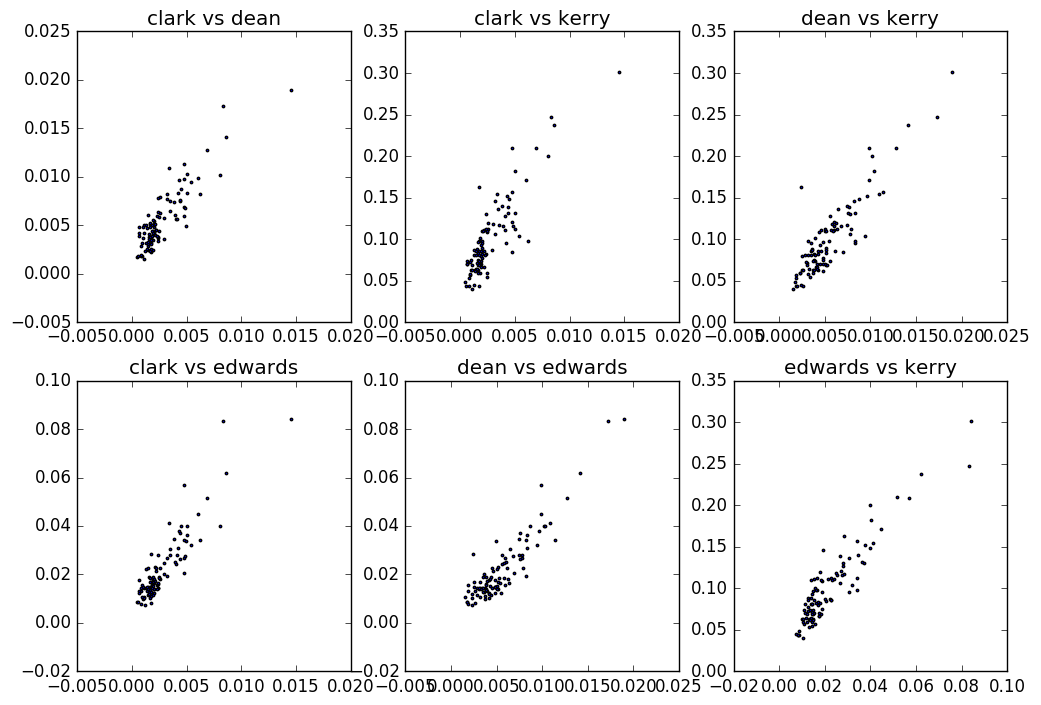

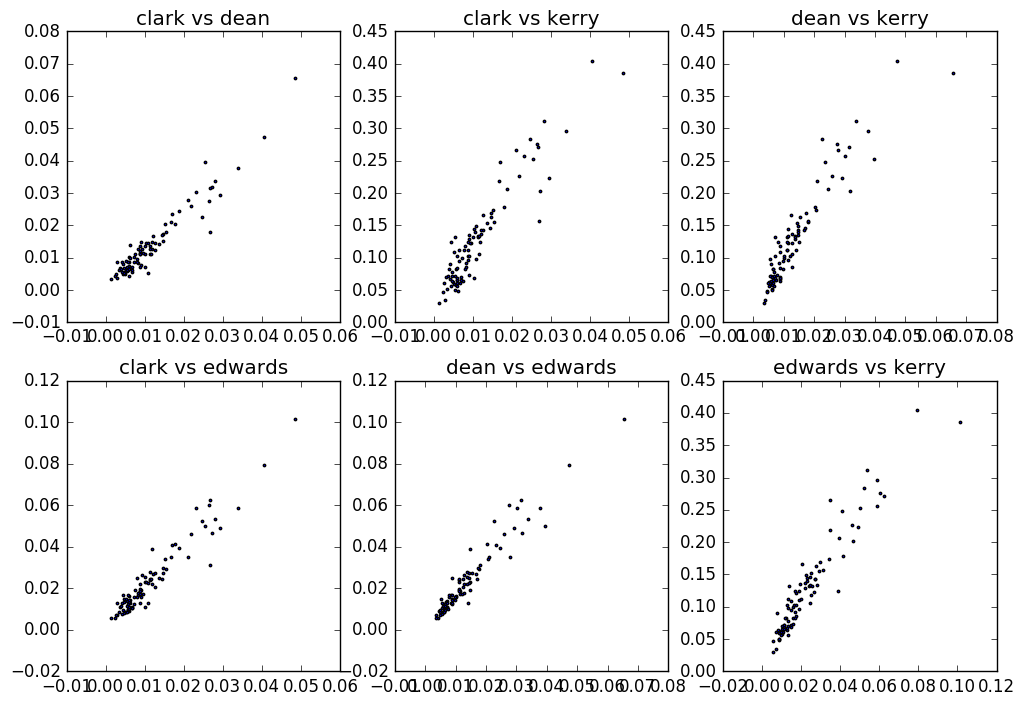

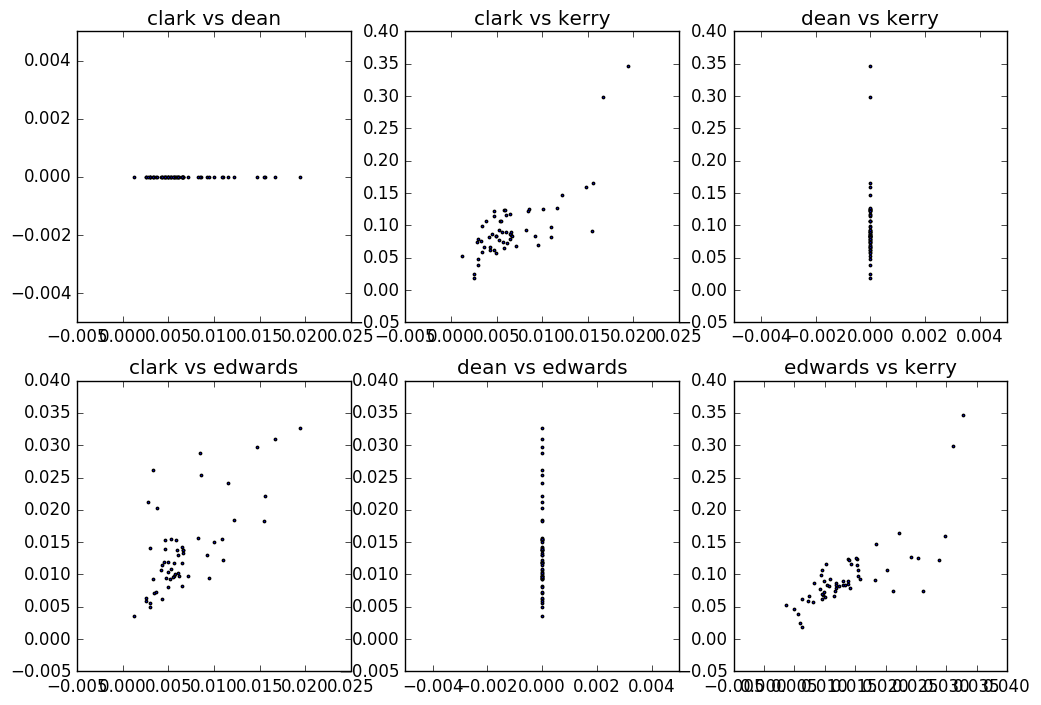

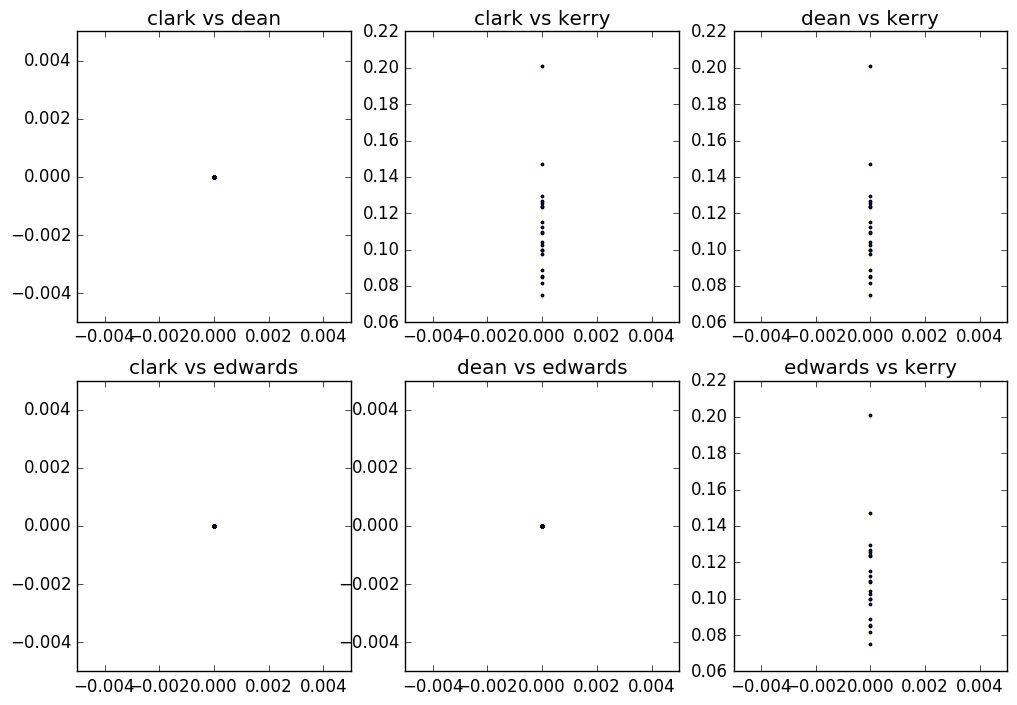

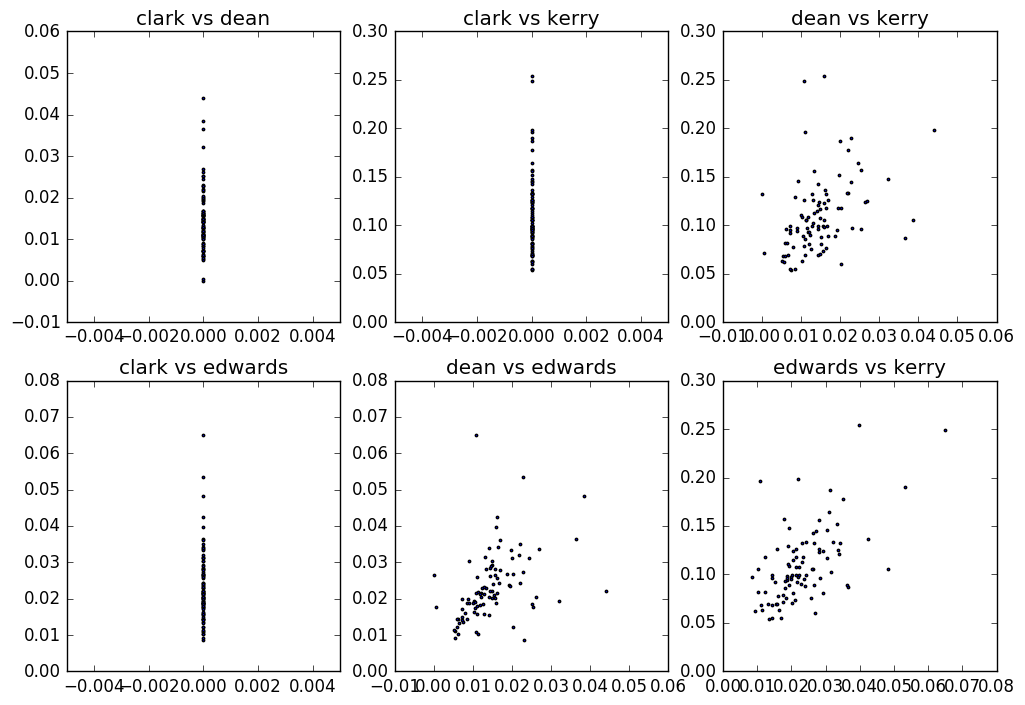

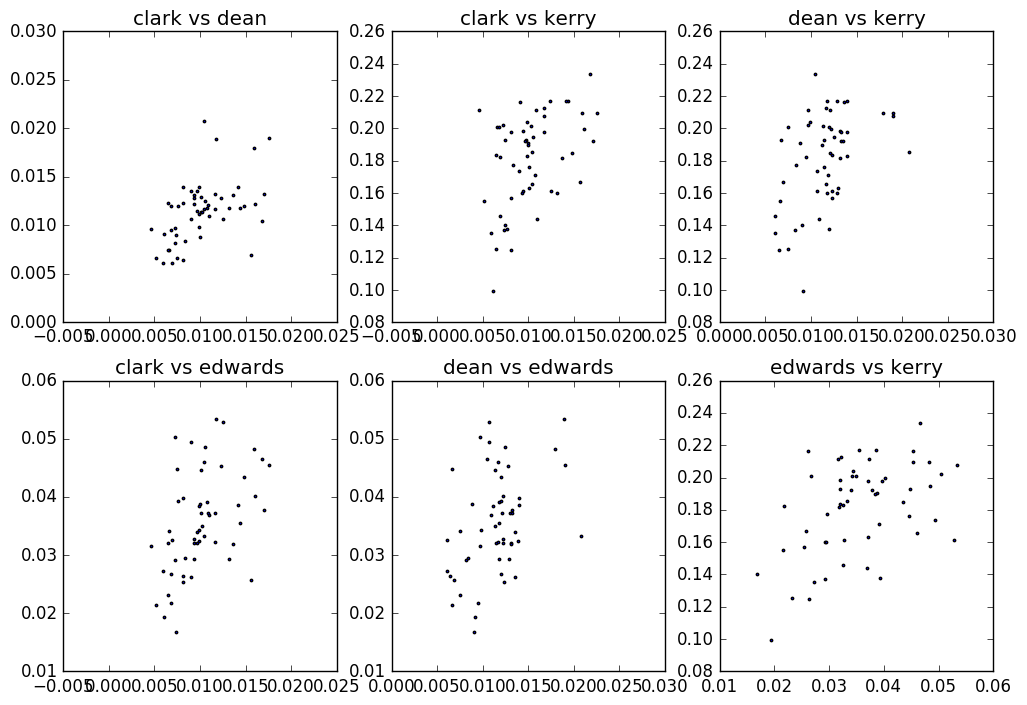

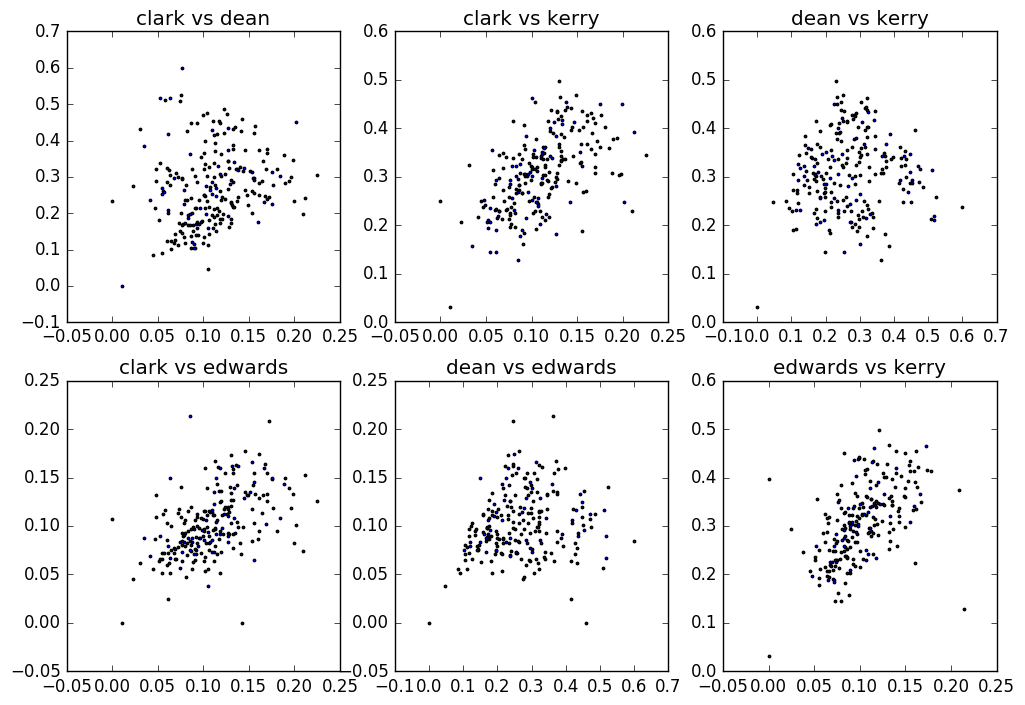

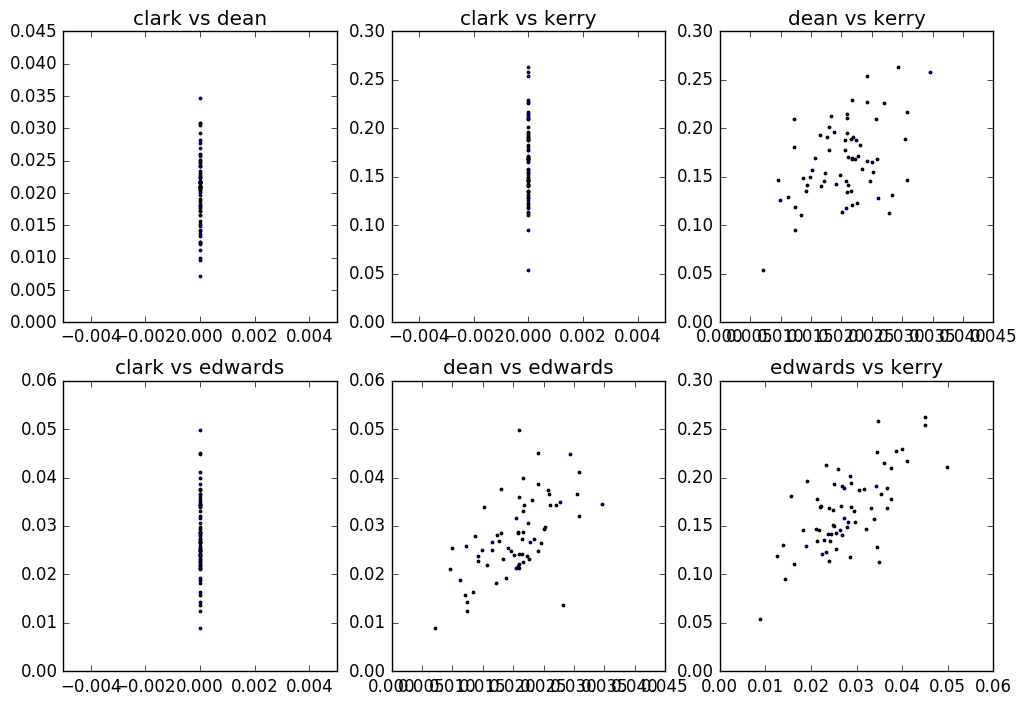

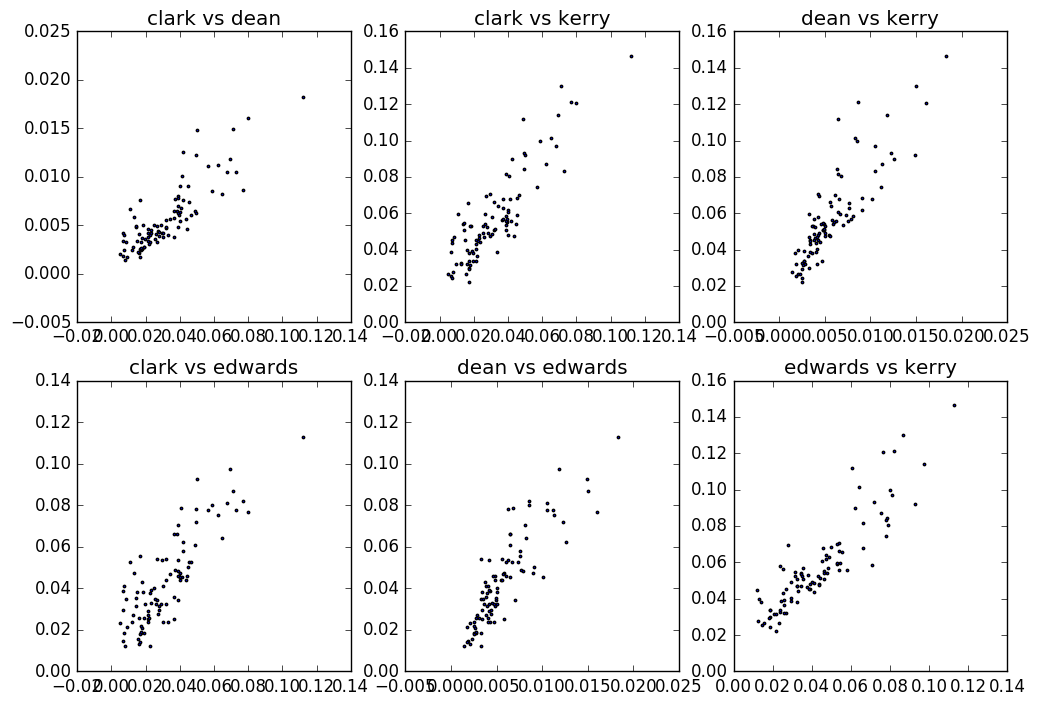

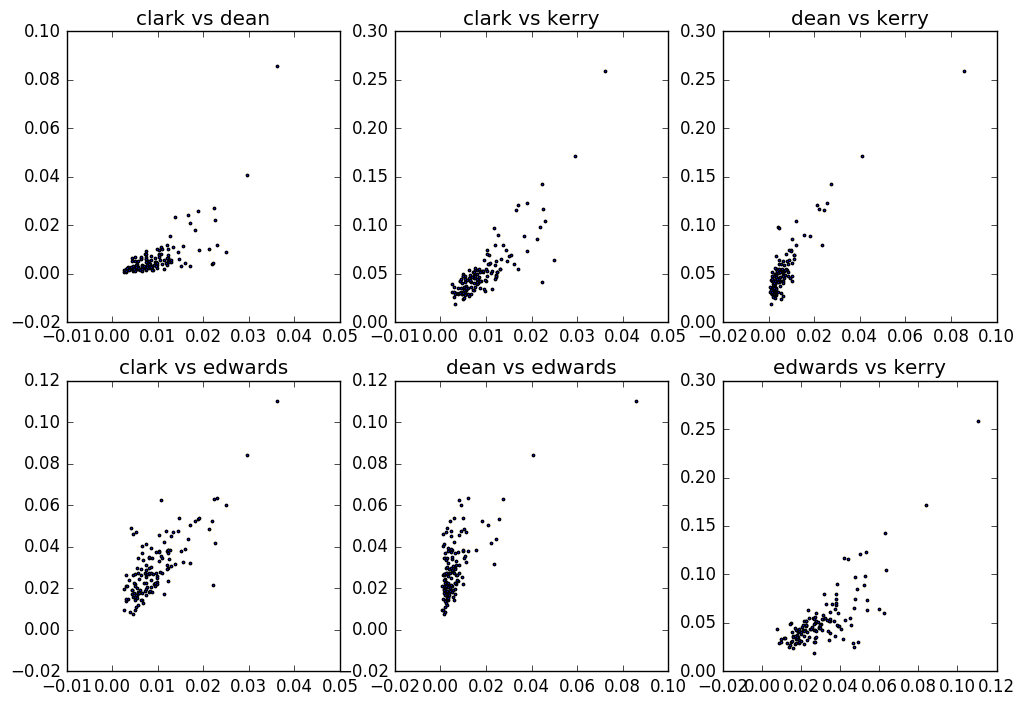

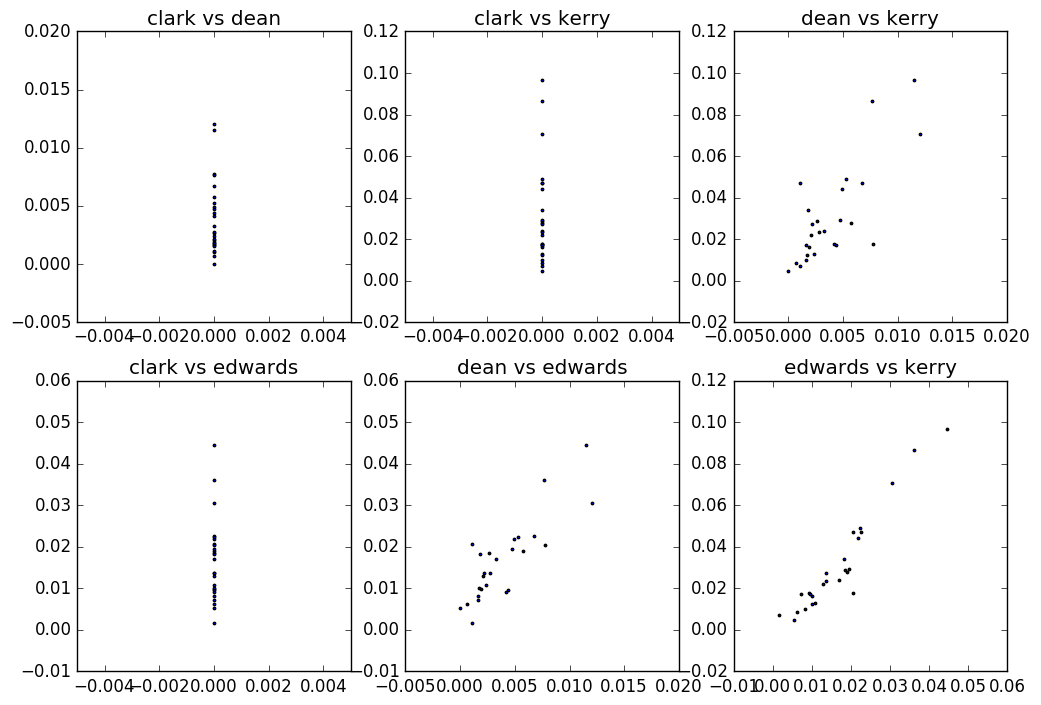

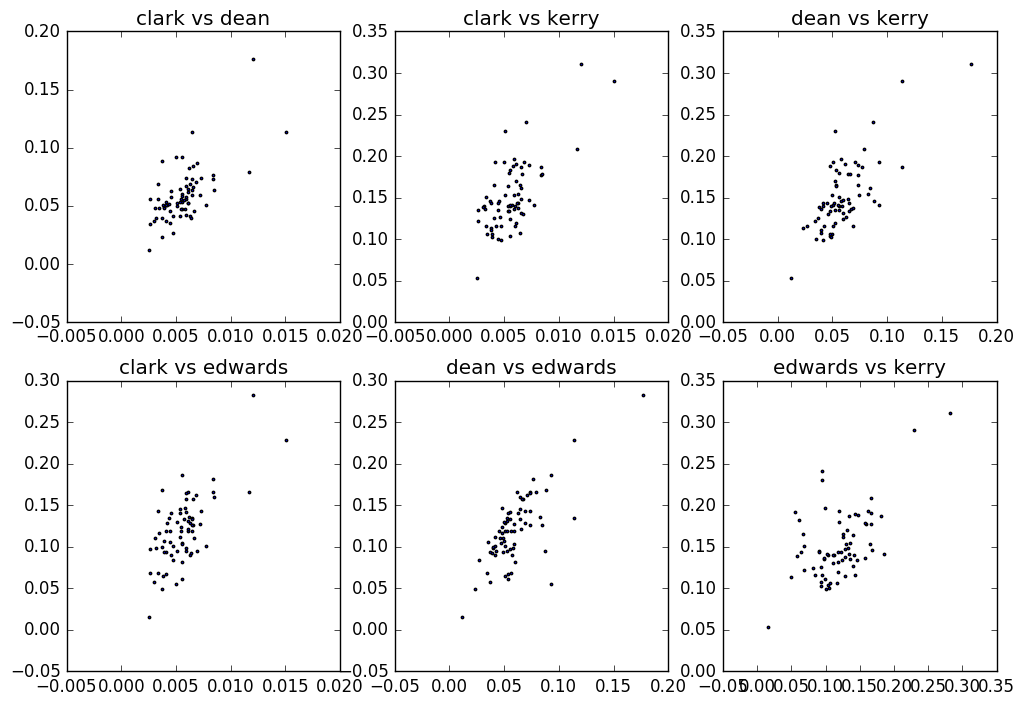

In [10]:
# Votes_sを用いる
plt = PyPlot
names = ["clark", "dean", "edwards", "kerry"]
DeltaO  = 0.6891
DeltaMO = 0.5366
combination = [(i, i+j) for i in 1:3 for j in 1:(4-i)]

for S in 1:size(Cand,1)

    DELTA = DeltaO*Open+DeltaMO*MOpen
    RTOT = RDemHat.*(1+DELTA)-VOther
    RTot_s = RTOT[Cand[S, 14]:Cand[S, 15], :]
    RTot_s = max(RTot_s, sum(Votes[Cand[S, 14]:Cand[S, 15], :], 2))
    Votes_s = Votes[Cand[S, 14]:Cand[S, 15], :]./(RTot_s*ones(1,4))

    num_rows, num_cols = 2, 3
    fig, axes = subplots(num_rows, num_cols, figsize=(12, 8))
    axes = vec(axes)

    # cand1 vs cand2で、cand1が横軸、cand2が縦軸
    for (n,c) in enumerate(combination)
        cand1 = names[c[1]]
        cand2 = names[c[2]]
        ax = axes[n]
        ax[:scatter](Votes_s[:, c[1]], Votes_s[:, c[2]], s = 3)
        ax[:set_title]("$cand1 vs $cand2")
        #ax[:set_xticks]([0,0.25,0.5,0.75])
        #ax[:set_yticks]([0,0.25,0.5,0.75])
        savefig("state_number_$S")
    end
end
        
    


## 二つ目

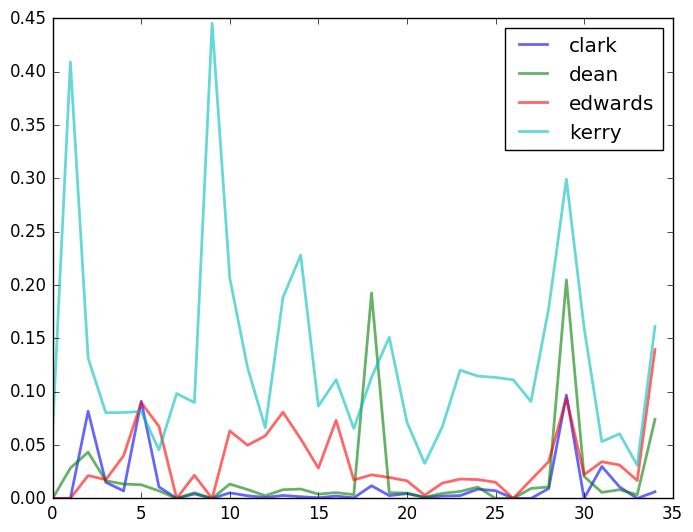

In [35]:
shares = Array(Float64, size(Cand,1), 4)

for S in 1:size(Cand,1)
    shares[S,:] = sum(Votes[Cand[S, 14]:Cand[S, 15], :], 1)./ sum(RTOT[Cand[S, 14]:Cand[S, 15], :])
end

fig, ax = subplots()
for i in 1:4
    cand = names[i]
    ax[:plot](shares[:, i], linewidth=2, alpha=0.6, label="$cand")
end
ax[:legend]()
savefig("vote_share_states")

## 三つ目

In [12]:
# 人種の割合
# (white,black,otherasian+indian+other)の順番
dFXRace

3020×3 Array{Float64,2}:
 0.810272  0.173388   0.0163399
 0.882093  0.102615   0.0152917
 0.517332  0.46799    0.0146778
 0.769208  0.223692   0.0070991
 0.952964  0.0111547  0.0358813
 0.265601  0.725804   0.0085954
 0.58388   0.412795   0.0033251
 0.800173  0.184122   0.015705 
 0.611017  0.384757   0.0042266
 0.937479  0.0539249  0.0085961
 0.873385  0.109045   0.0175699
 0.555612  0.438388   0.0060002
 0.562471  0.430986   0.0065437
 ⋮                             
 0.414302  0.509073   0.0583763
 0.621227  0.309961   0.0562546
 0.877533  0.0755726  0.0309398
 0.343456  0.621993   0.0225511
 0.886961  0.065876   0.0321495
 0.47327   0.459132   0.0445664
 0.610868  0.263145   0.10883  
 0.723443  0.205992   0.0535477
 0.48229   0.46916    0.0287374
 0.66593   0.313042   0.008218 
 0.317782  0.657613   0.0169072
 0.748245  0.190217   0.0424863

In [17]:
# 教育水準の割合
# (overba,underba,hs,other)の順番
dFXEduc

3020×4 Array{Real,2}:
 0.180217   0.268694  0.338251  0.212838
 0.230663   0.29349   0.296094  0.179752
 0.109441   0.213008  0.32409   0.353461
 0.0710487  0.203545  0.357312  0.368095
 0.0959884  0.248383  0.360097  0.295531
 0.0774108  0.175033  0.352312  0.395244
 0.10409    0.228518  0.344955  0.322438
 0.152199   0.264487  0.322313  0.261001
 0.0954811  0.225211  0.320978  0.35833 
 0.0972363  0.189361  0.348588  0.364814
 0.0993746  0.204888  0.357656  0.338082
 0.0958463  0.206453  0.347242  0.350459
 0.120721   0.21088   0.376624  0.291775
 ⋮                                      
 0.0863374  0.194184  0.394842  0.324636
 0.192754   0.238743  0.319843  0.24866 
 0.214133   0.271058  0.326819  0.18799 
 0.16714    0.231805  0.37292   0.228135
 0.235483   0.270963  0.307874  0.18568 
 0.364959   0.291038  0.227864  0.11614 
 0.125606   0.233087  0.392332  0.248974
 0.199241   0.286545  0.313294  0.200921
 0.173905   0.309734  0.333852  0.182509
 0.129095   0.275985  0.350947  0.2

In [18]:
# 足せば1になるのでやはりこいつも各収入階層の割合を示している。
# [20000;35000;72500;120000]の順番
dFXIncm

3020×4 Array{Real,2}:
 0.28694   0.245429  0.391685  0.0759455
 0.289652  0.269438  0.345979  0.094931 
 0.49837   0.22431   0.226994  0.050326 
 0.412163  0.264256  0.288365  0.035216 
 0.335143  0.287631  0.327103  0.0501228
 0.573504  0.230403  0.170298  0.0257951
 0.503935  0.250179  0.198068  0.0478179
 0.399053  0.268797  0.272874  0.0592772
 0.430113  0.280303  0.256377  0.0332074
 0.406256  0.291521  0.265795  0.0364272
 0.371185  0.283235  0.305959  0.0396202
 0.50331   0.224149  0.223045  0.0494956
 0.465877  0.21724   0.267155  0.0497274
 ⋮                                      
 0.456798  0.256552  0.238227  0.0484234
 0.301206  0.237067  0.328543  0.133184 
 0.289636  0.239351  0.338315  0.132698 
 0.39833   0.24144   0.273866  0.0863643
 0.295791  0.23883   0.351934  0.113445 
 0.249336  0.223871  0.34975   0.177043 
 0.310825  0.249744  0.330599  0.108833 
 0.293871  0.229433  0.344183  0.132513 
 0.327208  0.236643  0.342856  0.0932933
 0.390385  0.244424  0.294482  0.07

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in transpose(::Ptr{

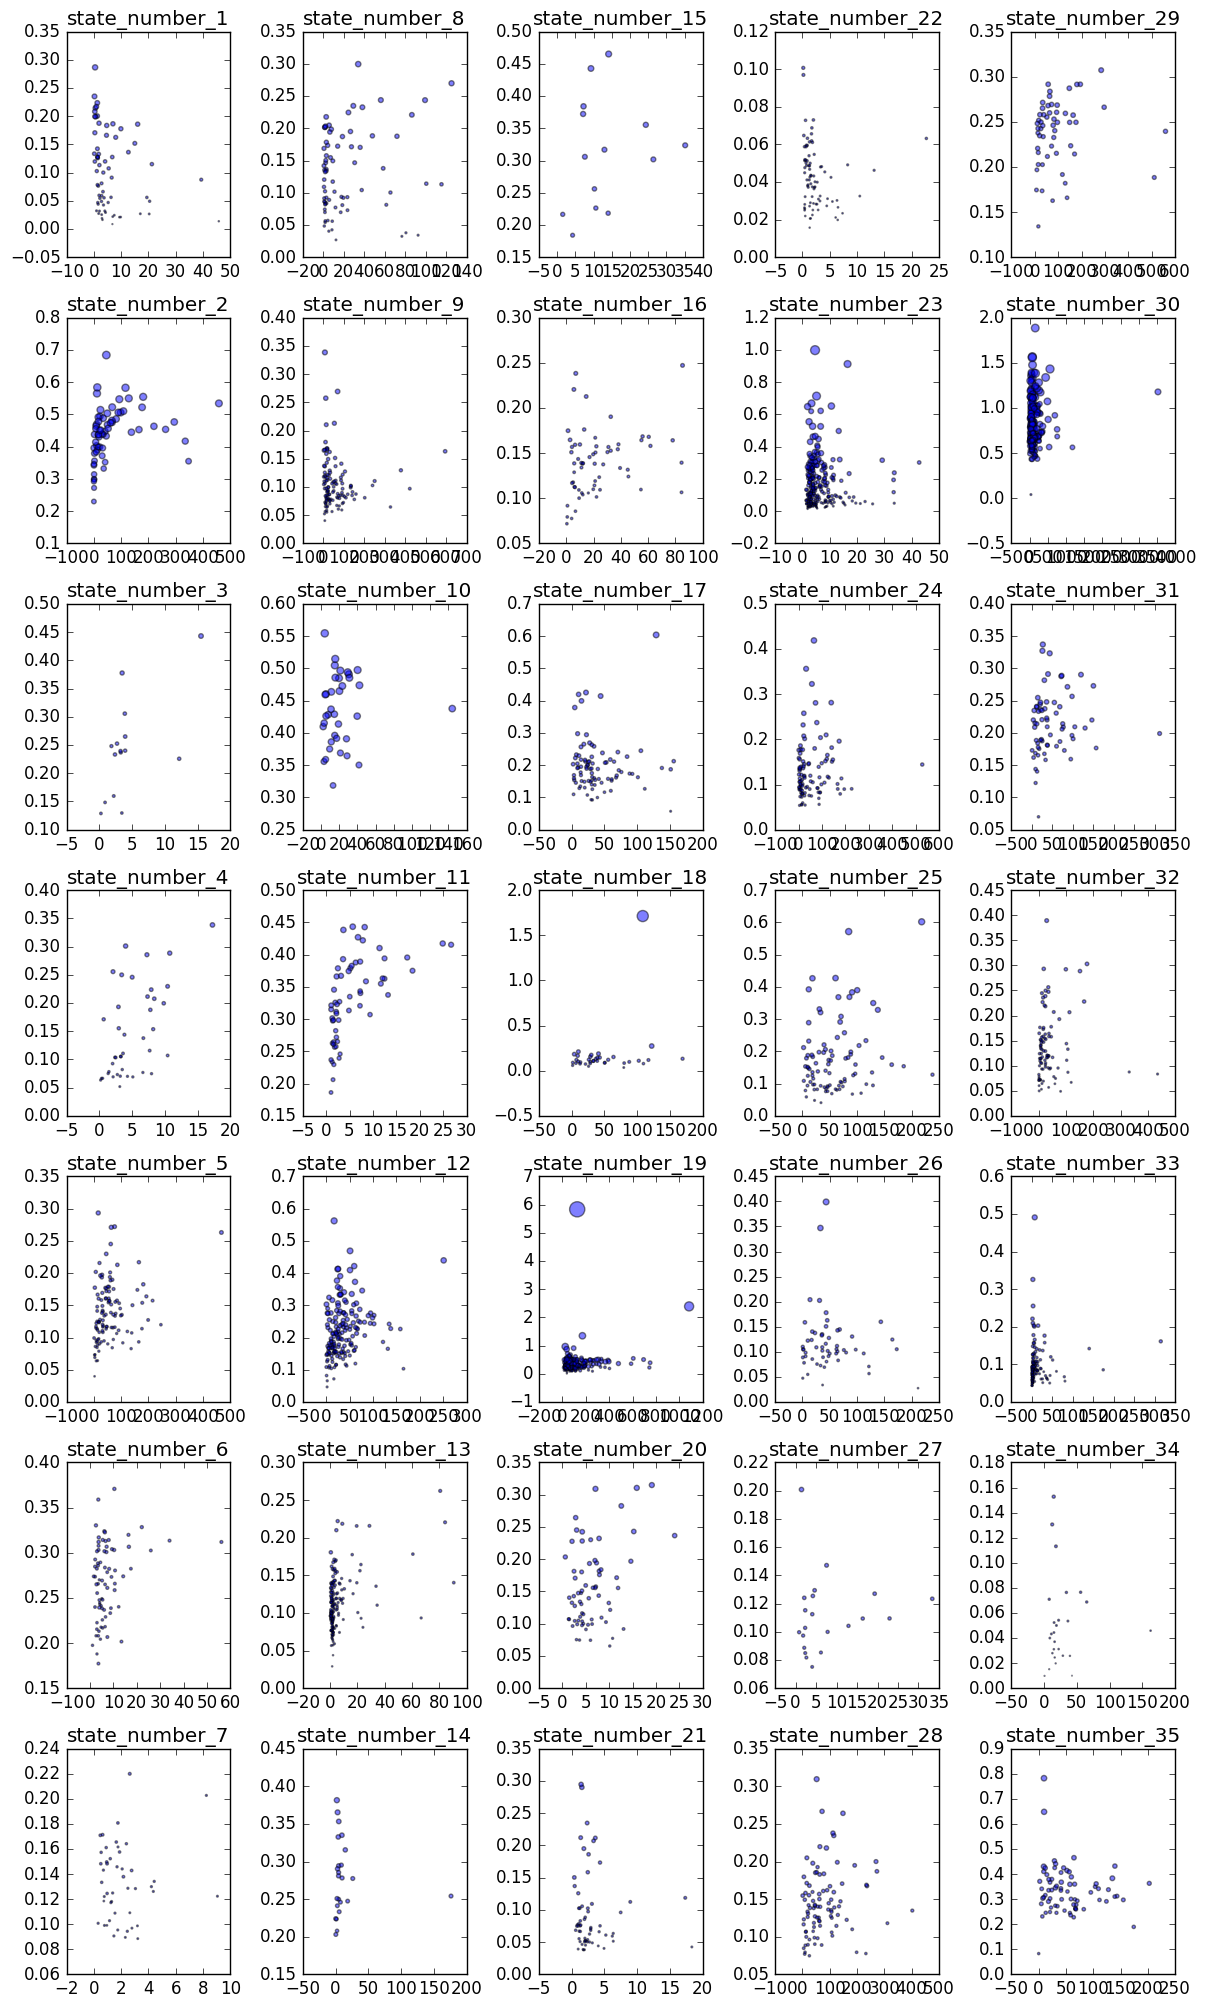

PyCall.PyObject_struct}) at ./deprecated.jl:770
 in transpose_f!(::Base.#transpose, ::Array{Ptr{PyCall.PyObject_struct},2}, ::Array{Ptr{PyCall.PyObject_struct},2}) at ./arraymath.jl:369
 in transpose(::Array{Ptr{PyCall.PyObject_struct},2}) at ./arraymath.jl:407
 in copy(::PyCall.PyArray{Ptr{PyCall.PyObject_struct},2}) at /Users/susu/.julia/v0.5/PyCall/src/numpy.jl:337
 in convert(::Type{Array{Ptr{PyCall.PyObject_struct},N}}, ::PyCall.PyObject) at /Users/susu/.julia/v0.5/PyCall/src/numpy.jl:453
 in convert(::Type{Array{PyCall.PyObject,N}}, ::PyCall.PyObject) at /Users/susu/.julia/v0.5/PyCall/src/numpy.jl:484
 in (::PyCall.##8#9{DataType,PyCall.PyObject})(::Int64) at /Users/susu/.julia/v0.5/PyCall/src/conversions.jl:180
 in ntuple(::PyCall.##8#9{DataType,PyCall.PyObject}, ::Int64) at ./tuple.jl:65
 in convert(::Type{Tuple{PyPlot.Figure,Array{PyCall.PyObject,N}}}, ::PyCall.PyObject) at /Users/susu/.julia/v0.5/PyCall/src/conversions.jl:180
 in convert(::Type{PyCall.PyAny}, ::PyCall.PyObjec

In [13]:
# 人種
plt = PyPlot
names = ["clark", "dean", "edwards", "kerry"]
DeltaO  = 0.6891
DeltaMO = 0.5366
DELTA = DeltaO*Open+DeltaMO*MOpen
RTOT = RDemHat.*(1+DELTA)-VOther

voterate = sum(Votes, 2)./RTOT
whiterate = dFXRace[:, 1]./sum(dFXRace[:,2:3],2)
kerry = Votes[:, 4]./RTOT

num_rows, num_cols = 7, 5
fig, axes = subplots(num_rows, num_cols, figsize=(12, 20))
axes = vec(axes)

for S in 1:size(Cand,1)

    voterate_s = voterate[Cand[S, 14]:Cand[S, 15], :]
    whiterate_s = whiterate[Cand[S, 14]:Cand[S, 15], :]
    kerry_s = kerry[Cand[S, 14]:Cand[S, 15], :]

    ax = axes[S]
    ax[:scatter](whiterate_s, voterate_s, s = 50*kerry_s, alpha = 0.5)
    ax[:set_title]("state_number_$S")
    #ax[:set_xticks]([0,0.25,0.5,0.75])
    #ax[:set_yticks]([0,0.25,0.5,0.75])
    
end
# matplotlibそのまんま使えるのね
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
savefig("race_plot")

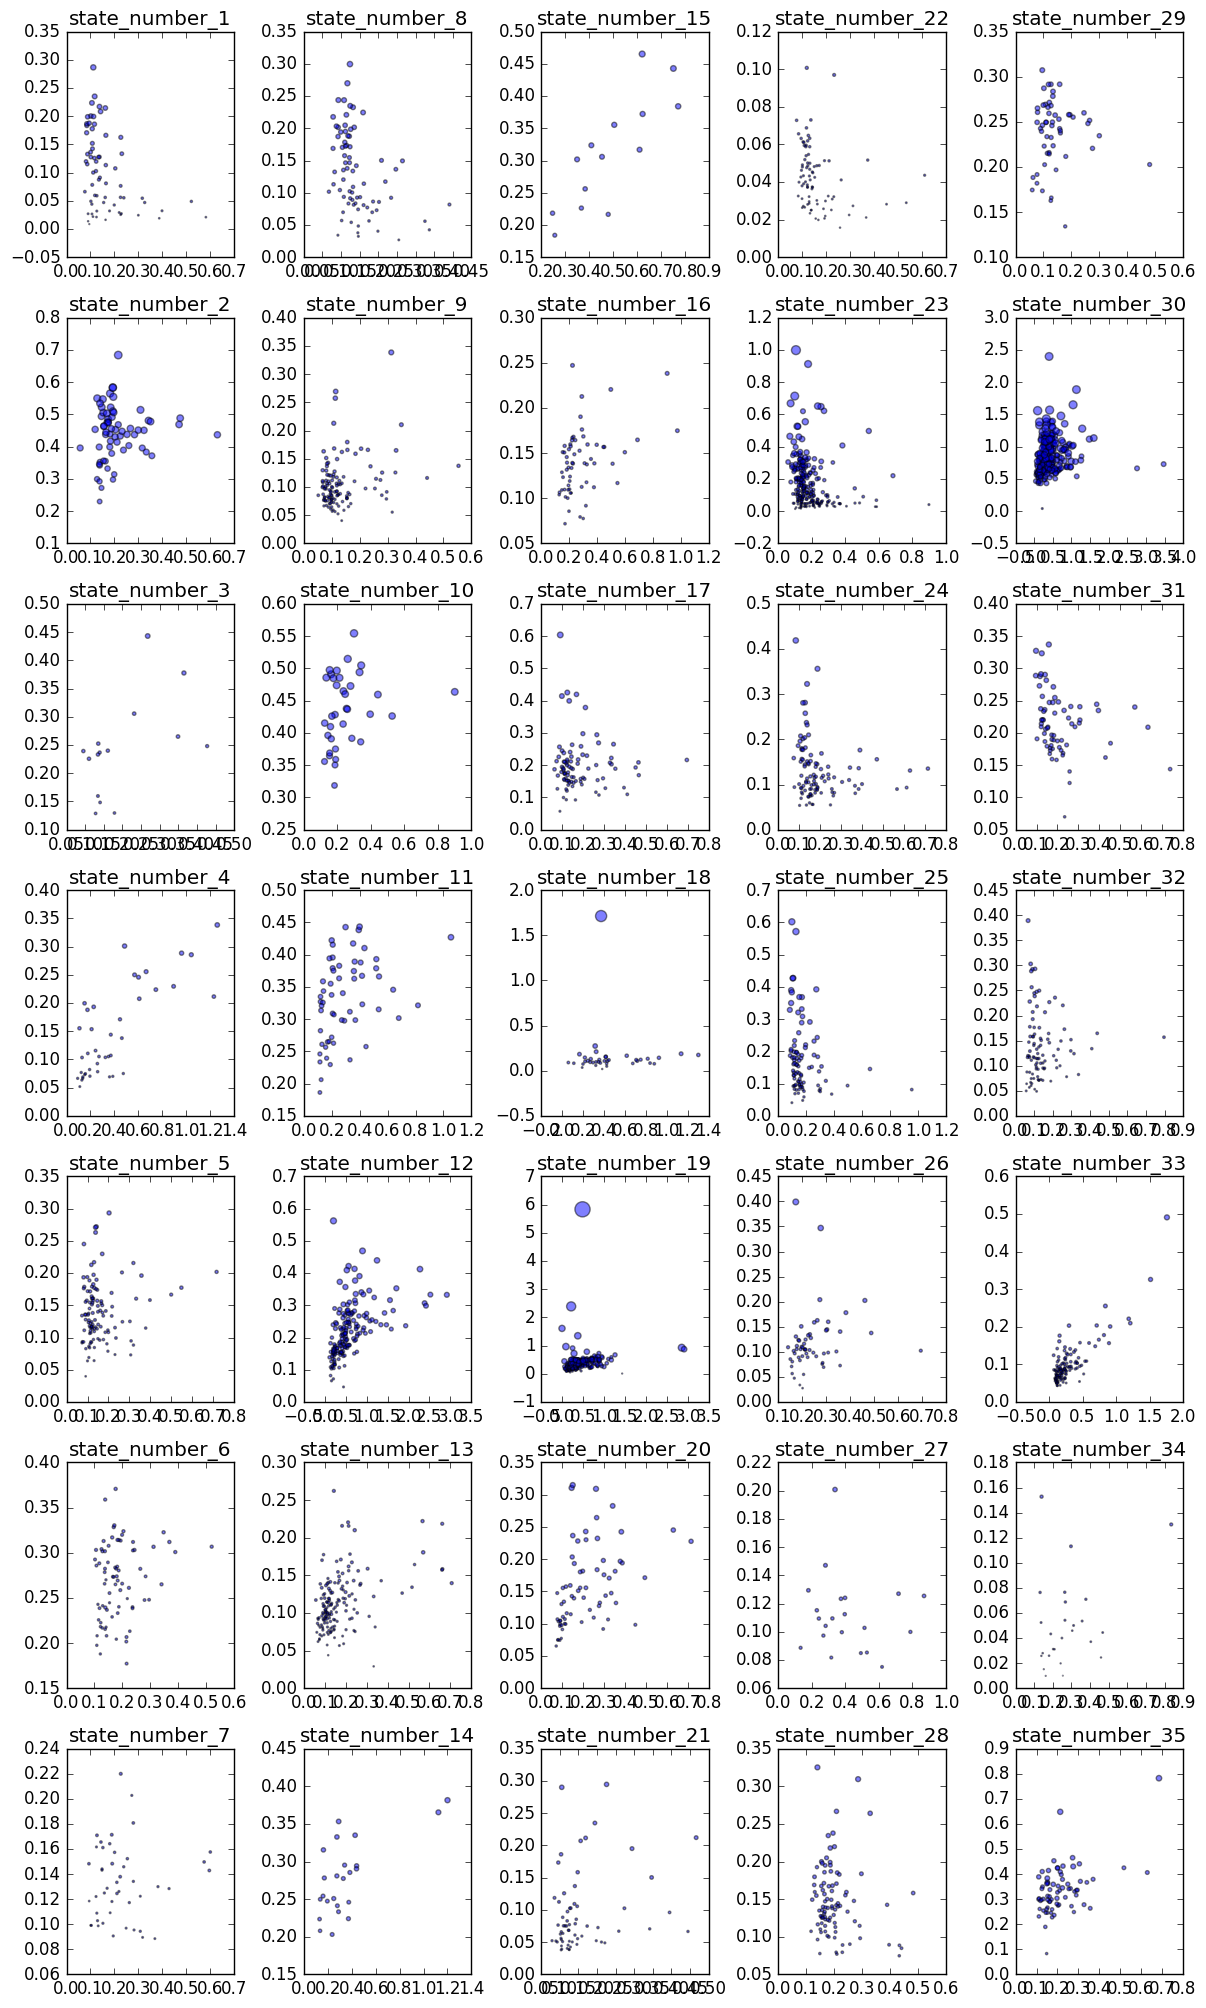

In [43]:
# 学歴
plt = PyPlot
names = ["clark", "dean", "edwards", "kerry"]
DeltaO  = 0.6891
DeltaMO = 0.5366
DELTA = DeltaO*Open+DeltaMO*MOpen
RTOT = RDemHat.*(1+DELTA)-VOther

voterate = sum(Votes, 2)./RTOT
educrate = dFXEduc[:, 1]./sum(dFXEduc[:,2:4],2)
kerry = Votes[:, 4]./RTOT

num_rows, num_cols = 7, 5
fig, axes = subplots(num_rows, num_cols, figsize=(12, 20))
axes = vec(axes)

for S in 1:size(Cand,1)

    voterate_s = voterate[Cand[S, 14]:Cand[S, 15], :]
    educrate_s = educrate[Cand[S, 14]:Cand[S, 15], :]
    kerry_s = kerry[Cand[S, 14]:Cand[S, 15], :]

    ax = axes[S]
    ax[:scatter](educrate_s, voterate_s, s = 50*kerry_s, alpha = 0.5)
    ax[:set_title]("state_number_$S")
    #ax[:set_xticks]([0,0.25,0.5,0.75])
    #ax[:set_yticks]([0,0.25,0.5,0.75])
    
end
# matplotlibそのまんま使えるのね
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
savefig("education_plot")

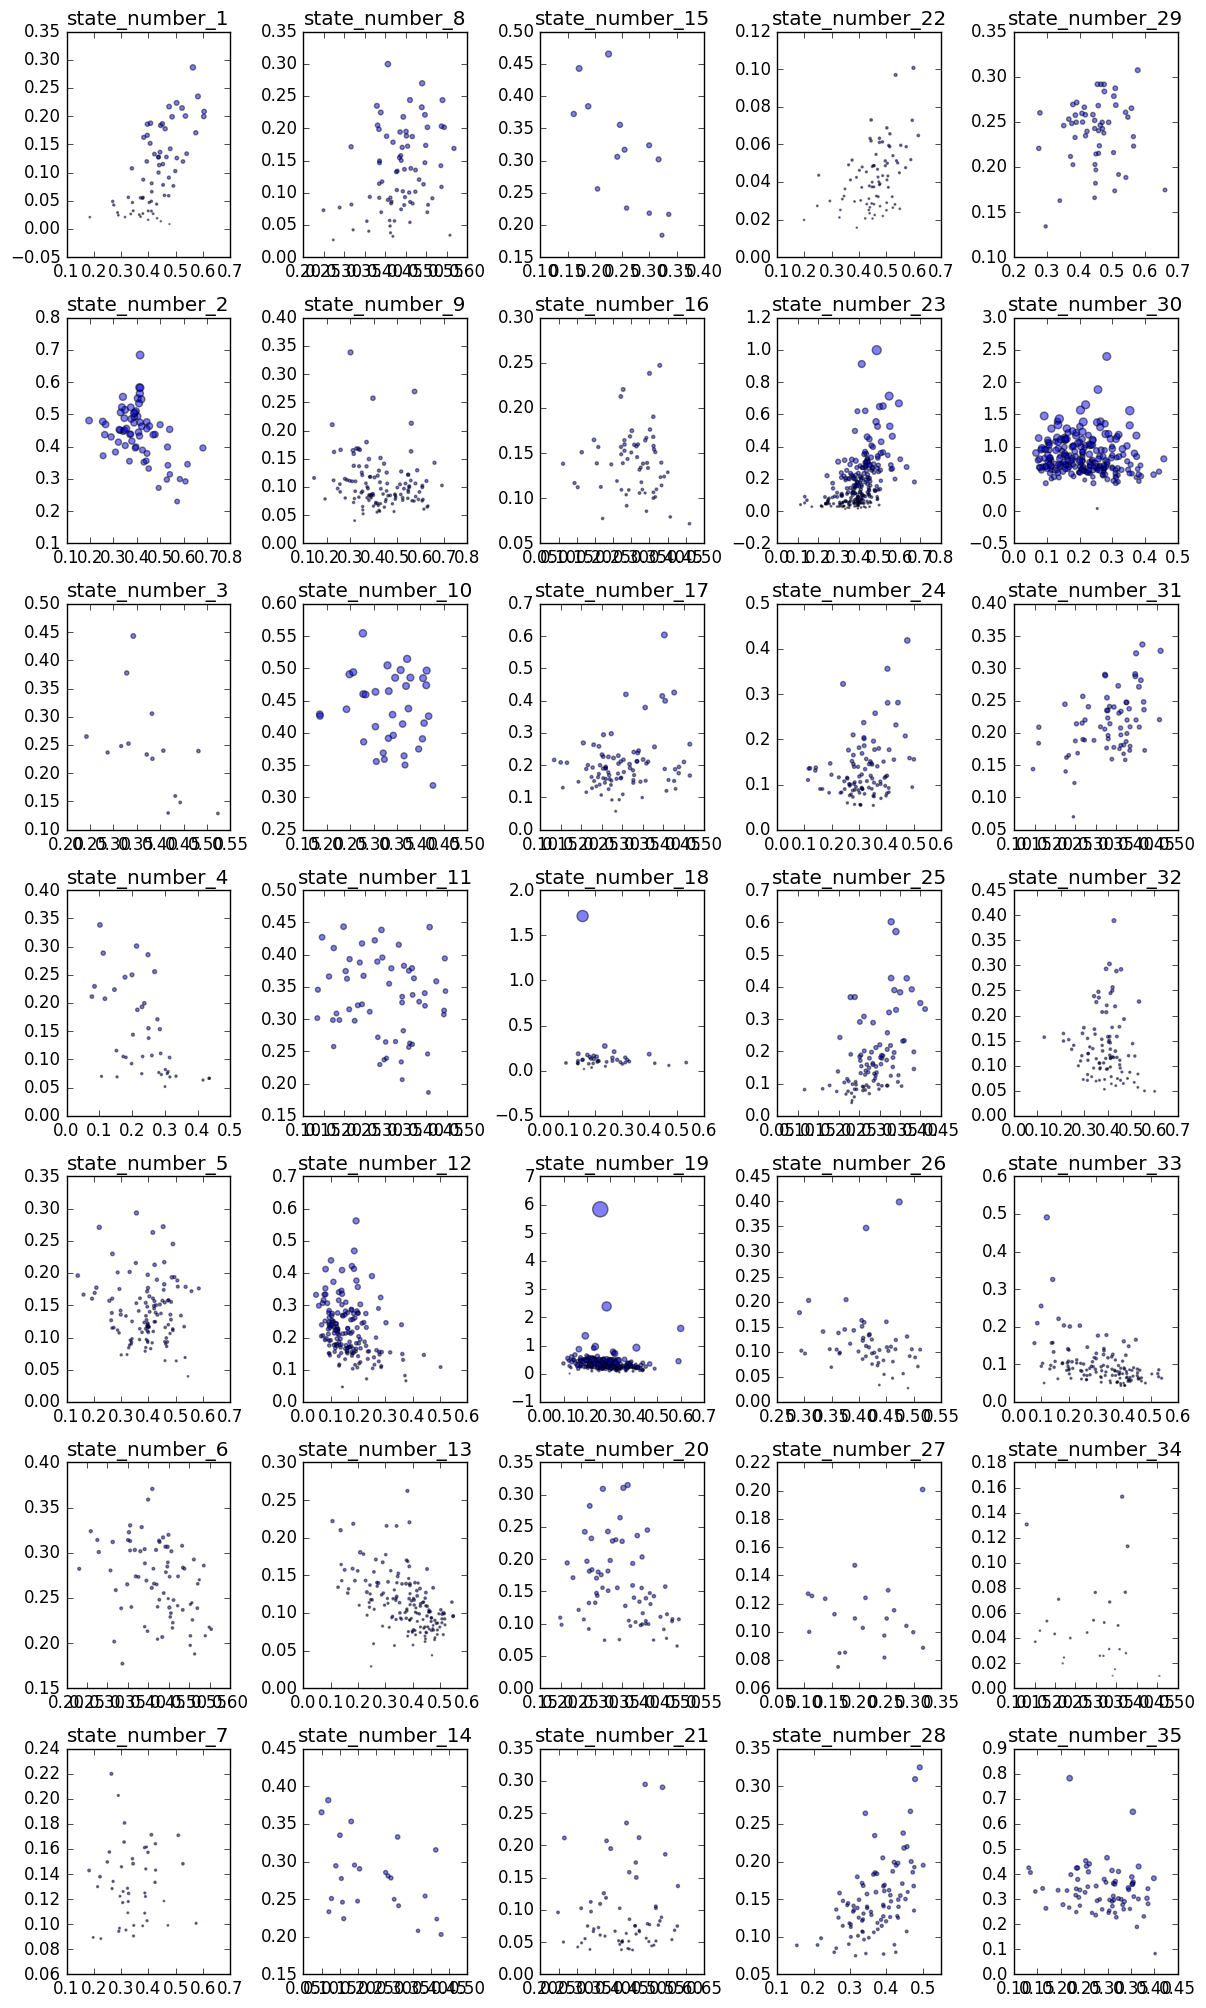

In [44]:
# 収入
plt = PyPlot
names = ["clark", "dean", "edwards", "kerry"]
DeltaO  = 0.6891
DeltaMO = 0.5366
DELTA = DeltaO*Open+DeltaMO*MOpen
RTOT = RDemHat.*(1+DELTA)-VOther

voterate = sum(Votes, 2)./RTOT
lowincome = dFXIncm[:, 1]
kerry = Votes[:, 4]./RTOT

num_rows, num_cols = 7, 5
fig, axes = subplots(num_rows, num_cols, figsize=(12, 20))
axes = vec(axes)

for S in 1:size(Cand,1)

    voterate_s = voterate[Cand[S, 14]:Cand[S, 15], :]
    lowincome_s = lowincome[Cand[S, 14]:Cand[S, 15], :]
    kerry_s = kerry[Cand[S, 14]:Cand[S, 15], :]

    ax = axes[S]
    ax[:scatter](lowincome_s, voterate_s, s = 50*kerry_s, alpha = 0.5)
    ax[:set_title]("state_number_$S")
    #ax[:set_xticks]([0,0.25,0.5,0.75])
    #ax[:set_yticks]([0,0.25,0.5,0.75])
    
end
# matplotlibそのまんま使えるのね
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
savefig("lowincome_plot")

## 以下simulation
### パラメータは以下のとおり

```
FAlph = Array(Float64, 2, 1)
# setting parameters
param[2] = -1
C0 = 0
# Raceの変更に伴い、Cxも4つの要素にする必要がある。
q = 4
Cx = param[1:q]
Cz = -abs(param[q+1:q+3])
FAlph[1,1] = abs(param[q+4])
FAlph[2,1] = abs(param[q+5])
param[q+4:q+5] = FAlph[1:2,1]
Sig_xsi  = max(0.5, abs(param[q+6]))
param[q+6] = Sig_xsi
DeltaO  = 0.6891
DeltaMO = 0.5366
# Raceをいじった関係でこのvkを4*4 = 16この要素にしなくちゃいけない
vk = param[12:27]
composite = param[75:149]
Tij = abs(param[150:260])

# new parameters
# rho_eta = abs(param[261])
rho_eta = 1
rho_chi = param[262:265]
mu_chi = param[266:269]
chi = param[270:273]
```


In [2]:
# シミュレーションコード
# parameterは一様分布から発生させてる
# なぜか初回だけ時間かかる？

simu_vote = Array(Float64, size(DATA, 1), 4)

# パラメータセット
FAlph = Array(Float64, 2, 1)
param = rand(273)
FAlph = Array(Float64, 2, 1)
# setting parameters
param[2] = -1
C0 = 0
# Raceの変更に伴い、Cxも4つの要素にする必要がある。
q = 4
Cx = param[1:q]
Cz = -abs(param[q+1:q+3])
FAlph[1,1] = abs(param[q+4])
FAlph[2,1] = abs(param[q+5])
param[q+4:q+5] = FAlph[1:2,1]
Sig_xsi  = max(0.5, abs(param[q+6]))
param[q+6] = Sig_xsi
DeltaO  = 0.6891
DeltaMO = 0.5366
# Raceをいじった関係でこのvkを4*4 = 16この要素にしなくちゃいけない
vk = param[12:27]
composite = param[75:149]
Tij = abs(param[150:260])

# new parameters
# rho_eta = abs(param[261])
rho_eta = 1
rho_chi = param[262:265]
mu_chi = param[266:269]
chi = param[270:273]


N_T_ij = [0;1;3;6]
# 上で拡張した関数を使用
Alpha = betainvcdf(FAlph[1,1],FAlph[2,1], SimAlp)
Xsi = Sig_xsi*SimXsi

# calculating utilities
# Base Utility for Sincere, [# of categories X # of candidates]
# VSinは48×4
VSin = X[:,2:end]*[vk[1:4] vk[5:8] vk[9:12] vk[13:16]]-C0-X[:, 2:end]*Cx*ones(1,4)
# Base Utility for Strategic, [# of categories X # of candidates]
# VStrも48×4
VStr = X[:, 2:end]*[vk[1:4] vk[5:8] vk[9:12] vk[13:16]]

#Eligible voters accounting for Open and Modified Open
DELTA = DeltaO*Open+DeltaMO*MOpen
RTOT = RDemHat.*(1+DELTA)-VOther

# store signals in advance
signals = randn(4,T) * sqrt(1/rho_eta)

for i in 1:4
    signals[i, :] = signals[i, :] + chi[i, 1]
end

for S in 1:size(Cand,1)
    println(S)

    if Cand[S, 15] - Cand[S, 14] < 21 || S == 30 || S == 34 #Excluding Utah, Wisconsin, and small
    else

        N_candS = sum(Cand[S,1:4] .!= 0)
        M = Cand[S, 15] - Cand[S, 14] + 1    # Number of municipalities in State S

        # 州ごとにmunicipality別の得票率を収める箱を作る
        # dropしてる人のところに999とか入れて、municipality数*4のArrayにぶちこむ
        # 本来のループではそれを盾に結合して全部の州についてまとまってるArrayを作る。
        simu_votes = Array(Float64, M, 4)

        if Cand[S, 11] == 0
            T_s = zeros(N_T_ij[N_candS,1],1)
            COMPOSITE = zeros(N_candS,1)
        else
            T_s = Tij[Cand[S, 11]:Cand[S, 12],1]
            COMPOSITE = composite[Cand[S, 16]:Cand[S, 17],1]
        end

        # VSTR_s = []
        Dropped_s = find(Cand[S,1:4] .== 0)            # index of candidates withdrawn.
        Rem = Cand[S,1:4] .!= 0
        Candidate_s = find(Cand[S,1:4] .== 1)        # index of cadidate
        Senate_s = DATA[Cand[S, 14], 27]*Cz[1,1]     # Cost from Senate elections
        Governer_s = DATA[Cand[S, 14], 29]*Cz[3,1]    # Cost from GOvernor elections
        dFX_s = dFX[Cand[S, 14]:Cand[S, 15], :]
        date = Cand[S, 13]                          # election date (1 ~ 14)

        # というか列の削除をする必要があるのか
        temp = Cand[S,1:4]
        PatternCand_d = Cand[S, 24:27]
        # temp[:, find(Cand[S,24:27] .== 0)] = []
        # PatternCand_d[:, find(Cand[S,24:27] .== 0)] = []
        temp = temp[Cand[S,24:27] .!= 0.0]
        PatternCand_d = PatternCand_d[Cand[S,24:27] .!= 0.0]

        Alpha_s = reshape(Alpha[Cand[S, 14]:Cand[S, 15], :, :], length(Cand[S, 14]:Cand[S, 15]), 100)
        Xsi_s = Xsi[Cand[S, 14]:Cand[S, 15], :, :]

        # そもそも削除する必要があるか
        VSin_s = VSin
        # VSin_s[:, Dropped_s] = []
        VSin_s = VSin_s[:, Rem]
        VStr_s = VStr
        # println(size(VStr_s, 2))
        # VStr_s[:, Dropped_s] = []
        VStr_s = VStr_s[:, Rem]

        # make XiOmg_s whose size is [1, num of candidates in the state]
        # take necessary parameters
        rho_chi_s = rho_chi[Candidate_s, 1]
        mu_chi_s = mu_chi[Candidate_s, 1]
        chi_s = chi[Candidate_s, 1]
        # calculating XiOmg_s
        # signals_s = signals[:, date]

        # cumsum は1次元配列にしか使えないので注意ダメだったらsqueeze
        cum_signals = cumsum(signals, 2)
        upper = rho_chi_s + mu_chi_s + rho_eta * cum_signals[Candidate_s, date]
        under = rho_chi_s + date * rho_eta
        XiOmg_s = upper ./ under

        VSin_s = VSin_s + ones(size(VSin_s,1), 1)*XiOmg_s' -Senate_s-Governer_s

        # col9は0~4、4は？

        if Cand[S, 9] == 1 && Cand[S, 10] == 1
            VSTR_s = ones(48, 4)
            Composite = ones(size(X,1),1)*COMPOSITE'
            VSTR_s[:,1] = T_s[1,1]*(VStr_s[:,1]-VStr_s[:,2])+T_s[2,1]*(VStr_s[:,1]-VStr_s[:,3])
            +T_s[3,1]*(VStr_s[:,1]-VStr_s[:,4])+Composite[:,1]
            VSTR_s[:,2] = T_s[1,1]*(VStr_s[:,2]-VStr_s[:,1])+T_s[4,1]*(VStr_s[:,2]-VStr_s[:,3])
            +T_s[5,1]*(VStr_s[:,2]-VStr_s[:,4])+Composite[:,2]
            VSTR_s[:,3] = T_s[2,1]*(VStr_s[:,3]-VStr_s[:,1])+T_s[4,1]*(VStr_s[:,3]-VStr_s[:,2])
            +T_s[6,1]*(VStr_s[:,3]-VStr_s[:,4])+Composite[:,3]
            VSTR_s[:,4] = T_s[3,1]*(VStr_s[:,4]-VStr_s[:,1])+T_s[5,1]*(VStr_s[:,4]-VStr_s[:,2])
            +T_s[6,1]*(VStr_s[:,4]-VStr_s[:,3])+Composite[:,4]

        elseif (Cand[S, 9] == 2 || Cand[S, 9] == 3 || Cand[S, 9] == 4) && Cand[S, 10] == 1
            VSTR_s = ones(48, 3)
            Composite = ones(size(X,1),1)*COMPOSITE'
            VSTR_s[:,1] = T_s[1,1]*(VStr_s[:,1]-VStr_s[:,2])+T_s[2,1]*(VStr_s[:,1]-VStr_s[:,3])
            +Composite[:,1]
            VSTR_s[:,2] = T_s[1,1]*(VStr_s[:,2]-VStr_s[:,1])+T_s[3,1]*(VStr_s[:,2]-VStr_s[:,3])
            +Composite[:,2]
            VSTR_s[:,3] = T_s[2,1]*(VStr_s[:,3]-VStr_s[:,1])+T_s[3,1]*(VStr_s[:,3]-VStr_s[:,2])
            +Composite[:,3]


        elseif Cand[S, 10] == 0  # after super tuesday
            VSTR_s=VSin_s+C0+X[:,2:end]*Cx*ones(1,N_candS)
            # VSTR_s = VSin_s + 2*(Senate_s+Governer_s)
        end

        # Utiltiy of Strategic with no house elections
        VSTR_s = VSTR_s - C0 - X[:,2:end]*Cx*ones(1,N_candS) - Senate_s - Governer_s

        # eligible voters
        RTot_s = RTOT[Cand[S, 14]:Cand[S, 15], :]
        RTot_s = max(RTot_s, sum(Votes[Cand[S, 14]:Cand[S, 15], :], 2))
        Votes_s = Votes[Cand[S, 14]:Cand[S, 15], :]./(RTot_s*ones(1,4)) #vote share data
        # 行削除
        # Votes_s[:, Dropped_s] = []
        Votes_s = Votes_s[:, Rem]
        loglik_m = zeros(M,1)

        VSTR_ss = Array(Float64, N_sim,N_candS)
        VSIN_ss = Array(Float64, N_sim,N_candS)

        # ここ以降が遅い
        # どっちも遅いが、beforeの方が平均的に遅い
        if Cand[S, 10] == 1

            A1 = Array(Float64, N_dFX, N_candS)
            A2 = Array(Float64, N_dFX, N_candS)
            B1 = Array(Float64, 1, N_candS)
            B2 = Array(Float64, 1, N_candS)
            cont1 = Array(Float64, N_dFX)
            cont2 = Array(Float64, N_dFX)
            #eVSIN_ss = Array(Float64, N_dFX, N_candS)
            #eVSTR_ss = Array(Float64, N_dFX, N_candS)

            for m in 1:M
                VSin_s = VSin_s - Cz[2,1]*DATA[Cand[S, 14] + m - 1, 28]
                VSTR_s = VSTR_s - Cz[2,1]*DATA[Cand[S, 14] + m - 1, 28]

                # for文に書き換え
                for sim in 1:N_sim

                    # nakami = max(min(VSin_s + ones(N_dFX,1)*reshape(Xsi_s[m,1:N_candS, sim], 1, N_candS), 200), -200)
                    # nakami2 = max(min(VSTR_s + ones(N_dFX,1)*reshape(Xsi_s[m,1:N_candS,sim], 1, N_candS), 200), -200)
                    for i in 1:N_candS
                        for j in 1:N_dFX
                            A1[j, i] = VSin_s[j, i] + Xsi_s[m, i, sim]
                            A2[j, i] = VSTR_s[j, i] + Xsi_s[m, i, sim]
                        end
                    end
                    nakami = max(min(A1, 200.0), -200.0)
                    nakami2 = max(min(A2, 200.0), -200.0)


                    eVSIN_ss = exp(nakami)./ (1+sum(exp(nakami),2)*ones(1,N_candS))
                    eVSTR_ss = exp(nakami2)./ (1+sum(exp(nakami2),2)*ones(1,N_candS))
                    #naka = sum(exp(nakami), 2)
                    #naka2 = sum(exp(nakami2), 2)
                    #for i in 1:N_candS
                      #  for j in 1:N_dFX
                        #    eVSIN_ss[j, i] = exp(nakami[j,i])/(1+ naka[j])
                           # eVSTR_ss[j, i] = exp(nakami2[j,i])/(1+ naka2[j])
                        #end
                    #end


                    # VSTR_ss[sim, :] = reshape(dFX_s[m, :],1, 48)*eVSTR_ss
                    # VSIN_ss[sim, :] = reshape(dFX_s[m, :], 1, 48)*eVSIN_ss
                    for i in 1:N_candS
                        for j in 1:N_dFX
                            cont1[j] = dFX_s[m, j]*eVSTR_ss[j, i]
                            cont2[j] = dFX_s[m, j]*eVSIN_ss[j, i]
                        end
                        VSTR_ss[sim,  i] = sum(cont1)
                        VSIN_ss[sim, i] = sum(cont2)
                    end

                end

                Alp_ss = Alpha_s[m, :]
                VSHARE = VSTR_ss.*(Alp_ss*ones(1,N_candS)) + VSIN_ss.*(1-Alp_ss*ones(1,N_candS))
                simu_votes[m, Candidate_s] = mean(VSHARE, 1)
                simu_votes[m, Dropped_s] = 0
            end
            simu_vote[Cand[S, 14]:Cand[S, 15], :] = simu_votes

        elseif Cand[S, 10] == 0

            A1 = Array(Float64, N_dFX, N_candS)
            B2 = Array(Float64, 1, N_candS)
            cont2 = Array(Float64, N_dFX)
            #eVSIN_ss = Array(Float64, N_dFX, N_candS)

            for m in 1:M
                VSin_s = VSin_s-Cz[2,1]*DATA[Cand[S, 14]+m-1, 28]
                AST = 1./(1+exp(C0+X[:,2:end]*Cx*ones(1,N_candS) + Cz[2,1]*DATA[Cand[S, 14]+m-1, 28]+Senate_s+Governer_s))
                # AST: Turnout of strategic voters after super tuesday
                for sim in 1:N_sim

                    # nakami = max(min(VSin_s + ones(N_dFX,1)*reshape(Xsi_s[m,1:N_candS, sim], 1, N_candS), 200), -200)
                    for i in 1:N_candS
                        for j in 1:N_dFX
                            A1[j, i] = VSin_s[j, i] + Xsi_s[m, i, sim]
                        end
                    end
                    nakami = max(min(A1, 200.0), -200.0)


                    eVSIN_ss = exp(nakami)./ (1 + sum(exp(nakami),2)*ones(1,N_candS))
                    # naka = sum(exp(nakami), 2)
                    # for i in 1:N_candS
                       # for j in 1:N_dFX
                          #  eVSIN_ss[j, i] = exp(nakami[j,i])/(1+ naka[j])
                        #end
                    #end


                    # VSIN_ss[sim, :] = reshape(dFX_s[m, :], 1, 48) * eVSIN_ss
                    for i in 1:N_candS
                        for j in 1:N_dFX
                            cont2[j] = dFX_s[m, j]*eVSIN_ss[j, i]
                        end
                        VSIN_ss[sim, i] = sum(cont2)
                    end

                end
                VSHARE = VSIN_ss
                simu_votes[m, Candidate_s] = mean(VSHARE, 1)
                simu_votes[m, Dropped_s] = 0
            end
            simu_vote[Cand[S, 14]:Cand[S, 15], :] = simu_votes
        end
    end
end

full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in '

In [3]:
simu_vote

3020×4 Array{Float64,2}:
 0.0          0.0       0.0         0.336575   
 0.0          0.0       0.0         0.327785   
 0.0          0.0       0.0         0.358893   
 0.0          0.0       0.0         0.321791   
 0.0          0.0       0.0         0.351386   
 0.0          0.0       0.0         0.309306   
 0.0          0.0       0.0         0.316231   
 0.0          0.0       0.0         0.355108   
 0.0          0.0       0.0         0.348746   
 0.0          0.0       0.0         0.334231   
 0.0          0.0       0.0         0.353314   
 0.0          0.0       0.0         0.436407   
 0.0          0.0       0.0         0.543397   
 ⋮                                             
 0.00104257   0.779316  0.00905213  0.000107107
 0.000896566  0.77684   0.0136474   0.00012052 
 0.00196757   0.784681  0.0103918   9.22822e-5 
 0.00120721   0.789348  0.0093919   0.000107565
 0.000471379  0.748574  0.0101882   7.44477e-5 
 0.000464188  0.803197  0.00601342  7.32094e-5 
 0.00126297   0

## typeとして実装しておく

In [5]:
type simulation
    param::Array{Float64, 1}
end

In [6]:
function simulate(m::simulation)
    simu_vote = Array(Float64, size(DATA, 1), 4)

    # パラメータセット
    FAlph = Array(Float64, 2, 1)
    param = m.param
    FAlph = Array(Float64, 2, 1)
    # setting parameters
    param[2] = -1
    C0 = 0
    # Raceの変更に伴い、Cxも4つの要素にする必要がある。
    q = 4
    Cx = param[1:q]
    Cz = -abs(param[q+1:q+3])
    FAlph[1,1] = abs(param[q+4])
    FAlph[2,1] = abs(param[q+5])
    param[q+4:q+5] = FAlph[1:2,1]
    Sig_xsi  = max(0.5, abs(param[q+6]))
    param[q+6] = Sig_xsi
    DeltaO  = 0.6891
    DeltaMO = 0.5366
    # Raceをいじった関係でこのvkを4*4 = 16この要素にしなくちゃいけない
    vk = param[12:27]
    composite = param[75:149]
    Tij = abs(param[150:260])

    # new parameters
    # rho_eta = abs(param[261])
    rho_eta = 1
    rho_chi = param[262:265]
    mu_chi = param[266:269]
    chi = param[270:273]


    N_T_ij = [0;1;3;6]
    # 上で拡張した関数を使用
    Alpha = betainvcdf(FAlph[1,1],FAlph[2,1], SimAlp)
    Xsi = Sig_xsi*SimXsi

    # calculating utilities
    # Base Utility for Sincere, [# of categories X # of candidates]
    # VSinは48×4
    VSin = X[:,2:end]*[vk[1:4] vk[5:8] vk[9:12] vk[13:16]]-C0-X[:, 2:end]*Cx*ones(1,4)
    # Base Utility for Strategic, [# of categories X # of candidates]
    # VStrも48×4
    VStr = X[:, 2:end]*[vk[1:4] vk[5:8] vk[9:12] vk[13:16]]

    #Eligible voters accounting for Open and Modified Open
    DELTA = DeltaO*Open+DeltaMO*MOpen
    RTOT = RDemHat.*(1+DELTA)-VOther

    # store signals in advance
    signals = randn(4,T) * sqrt(1/rho_eta)

    for i in 1:4
        signals[i, :] = signals[i, :] + chi[i, 1]
    end

    for S in 1:size(Cand,1)
        println(S)

        if Cand[S, 15] - Cand[S, 14] < 21 || S == 30 || S == 34 #Excluding Utah, Wisconsin, and small
        else

            N_candS = sum(Cand[S,1:4] .!= 0)
            M = Cand[S, 15] - Cand[S, 14] + 1    # Number of municipalities in State S

            # 州ごとにmunicipality別の得票率を収める箱を作る
            # dropしてる人のところに999とか入れて、municipality数*4のArrayにぶちこむ
            # 本来のループではそれを盾に結合して全部の州についてまとまってるArrayを作る。
            simu_votes = Array(Float64, M, 4)

            if Cand[S, 11] == 0
                T_s = zeros(N_T_ij[N_candS,1],1)
                COMPOSITE = zeros(N_candS,1)
            else
                T_s = Tij[Cand[S, 11]:Cand[S, 12],1]
                COMPOSITE = composite[Cand[S, 16]:Cand[S, 17],1]
            end

            # VSTR_s = []
            Dropped_s = find(Cand[S,1:4] .== 0)            # index of candidates withdrawn.
            Rem = Cand[S,1:4] .!= 0
            Candidate_s = find(Cand[S,1:4] .== 1)        # index of cadidate
            Senate_s = DATA[Cand[S, 14], 27]*Cz[1,1]     # Cost from Senate elections
            Governer_s = DATA[Cand[S, 14], 29]*Cz[3,1]    # Cost from GOvernor elections
            dFX_s = dFX[Cand[S, 14]:Cand[S, 15], :]
            date = Cand[S, 13]                          # election date (1 ~ 14)

            # というか列の削除をする必要があるのか
            temp = Cand[S,1:4]
            PatternCand_d = Cand[S, 24:27]
            # temp[:, find(Cand[S,24:27] .== 0)] = []
            # PatternCand_d[:, find(Cand[S,24:27] .== 0)] = []
            temp = temp[Cand[S,24:27] .!= 0.0]
            PatternCand_d = PatternCand_d[Cand[S,24:27] .!= 0.0]

            Alpha_s = reshape(Alpha[Cand[S, 14]:Cand[S, 15], :, :], length(Cand[S, 14]:Cand[S, 15]), 100)
            Xsi_s = Xsi[Cand[S, 14]:Cand[S, 15], :, :]

            # そもそも削除する必要があるか
            VSin_s = VSin
            # VSin_s[:, Dropped_s] = []
            VSin_s = VSin_s[:, Rem]
            VStr_s = VStr
            # println(size(VStr_s, 2))
            # VStr_s[:, Dropped_s] = []
            VStr_s = VStr_s[:, Rem]

            # make XiOmg_s whose size is [1, num of candidates in the state]
            # take necessary parameters
            rho_chi_s = rho_chi[Candidate_s, 1]
            mu_chi_s = mu_chi[Candidate_s, 1]
            chi_s = chi[Candidate_s, 1]
            # calculating XiOmg_s
            # signals_s = signals[:, date]

            # cumsum は1次元配列にしか使えないので注意ダメだったらsqueeze
            cum_signals = cumsum(signals, 2)
            upper = rho_chi_s + mu_chi_s + rho_eta * cum_signals[Candidate_s, date]
            under = rho_chi_s + date * rho_eta
            XiOmg_s = upper ./ under

            VSin_s = VSin_s + ones(size(VSin_s,1), 1)*XiOmg_s' -Senate_s-Governer_s

            # col9は0~4、4は？

            if Cand[S, 9] == 1 && Cand[S, 10] == 1
                VSTR_s = ones(48, 4)
                Composite = ones(size(X,1),1)*COMPOSITE'
                VSTR_s[:,1] = T_s[1,1]*(VStr_s[:,1]-VStr_s[:,2])+T_s[2,1]*(VStr_s[:,1]-VStr_s[:,3])
                +T_s[3,1]*(VStr_s[:,1]-VStr_s[:,4])+Composite[:,1]
                VSTR_s[:,2] = T_s[1,1]*(VStr_s[:,2]-VStr_s[:,1])+T_s[4,1]*(VStr_s[:,2]-VStr_s[:,3])
                +T_s[5,1]*(VStr_s[:,2]-VStr_s[:,4])+Composite[:,2]
                VSTR_s[:,3] = T_s[2,1]*(VStr_s[:,3]-VStr_s[:,1])+T_s[4,1]*(VStr_s[:,3]-VStr_s[:,2])
                +T_s[6,1]*(VStr_s[:,3]-VStr_s[:,4])+Composite[:,3]
                VSTR_s[:,4] = T_s[3,1]*(VStr_s[:,4]-VStr_s[:,1])+T_s[5,1]*(VStr_s[:,4]-VStr_s[:,2])
                +T_s[6,1]*(VStr_s[:,4]-VStr_s[:,3])+Composite[:,4]

            elseif (Cand[S, 9] == 2 || Cand[S, 9] == 3 || Cand[S, 9] == 4) && Cand[S, 10] == 1
                VSTR_s = ones(48, 3)
                Composite = ones(size(X,1),1)*COMPOSITE'
                VSTR_s[:,1] = T_s[1,1]*(VStr_s[:,1]-VStr_s[:,2])+T_s[2,1]*(VStr_s[:,1]-VStr_s[:,3])
                +Composite[:,1]
                VSTR_s[:,2] = T_s[1,1]*(VStr_s[:,2]-VStr_s[:,1])+T_s[3,1]*(VStr_s[:,2]-VStr_s[:,3])
                +Composite[:,2]
                VSTR_s[:,3] = T_s[2,1]*(VStr_s[:,3]-VStr_s[:,1])+T_s[3,1]*(VStr_s[:,3]-VStr_s[:,2])
                +Composite[:,3]


            elseif Cand[S, 10] == 0  # after super tuesday
                VSTR_s=VSin_s+C0+X[:,2:end]*Cx*ones(1,N_candS)
                # VSTR_s = VSin_s + 2*(Senate_s+Governer_s)
            end

            # Utiltiy of Strategic with no house elections
            VSTR_s = VSTR_s - C0 - X[:,2:end]*Cx*ones(1,N_candS) - Senate_s - Governer_s

            # eligible voters
            RTot_s = RTOT[Cand[S, 14]:Cand[S, 15], :]
            RTot_s = max(RTot_s, sum(Votes[Cand[S, 14]:Cand[S, 15], :], 2))
            Votes_s = Votes[Cand[S, 14]:Cand[S, 15], :]./(RTot_s*ones(1,4)) #vote share data
            # 行削除
            # Votes_s[:, Dropped_s] = []
            Votes_s = Votes_s[:, Rem]
            loglik_m = zeros(M,1)

            VSTR_ss = Array(Float64, N_sim,N_candS)
            VSIN_ss = Array(Float64, N_sim,N_candS)

            # ここ以降が遅い
            # どっちも遅いが、beforeの方が平均的に遅い
            if Cand[S, 10] == 1

                A1 = Array(Float64, N_dFX, N_candS)
                A2 = Array(Float64, N_dFX, N_candS)
                B1 = Array(Float64, 1, N_candS)
                B2 = Array(Float64, 1, N_candS)
                cont1 = Array(Float64, N_dFX)
                cont2 = Array(Float64, N_dFX)
                #eVSIN_ss = Array(Float64, N_dFX, N_candS)
                #eVSTR_ss = Array(Float64, N_dFX, N_candS)

                for m in 1:M
                    VSin_s = VSin_s - Cz[2,1]*DATA[Cand[S, 14] + m - 1, 28]
                    VSTR_s = VSTR_s - Cz[2,1]*DATA[Cand[S, 14] + m - 1, 28]

                    # for文に書き換え
                    for sim in 1:N_sim

                        # nakami = max(min(VSin_s + ones(N_dFX,1)*reshape(Xsi_s[m,1:N_candS, sim], 1, N_candS), 200), -200)
                        # nakami2 = max(min(VSTR_s + ones(N_dFX,1)*reshape(Xsi_s[m,1:N_candS,sim], 1, N_candS), 200), -200)
                        for i in 1:N_candS
                            for j in 1:N_dFX
                                A1[j, i] = VSin_s[j, i] + Xsi_s[m, i, sim]
                                A2[j, i] = VSTR_s[j, i] + Xsi_s[m, i, sim]
                            end
                        end
                        nakami = max(min(A1, 200.0), -200.0)
                        nakami2 = max(min(A2, 200.0), -200.0)


                        eVSIN_ss = exp(nakami)./ (1+sum(exp(nakami),2)*ones(1,N_candS))
                        eVSTR_ss = exp(nakami2)./ (1+sum(exp(nakami2),2)*ones(1,N_candS))
                        #naka = sum(exp(nakami), 2)
                        #naka2 = sum(exp(nakami2), 2)
                        #for i in 1:N_candS
                          #  for j in 1:N_dFX
                            #    eVSIN_ss[j, i] = exp(nakami[j,i])/(1+ naka[j])
                               # eVSTR_ss[j, i] = exp(nakami2[j,i])/(1+ naka2[j])
                            #end
                        #end


                        # VSTR_ss[sim, :] = reshape(dFX_s[m, :],1, 48)*eVSTR_ss
                        # VSIN_ss[sim, :] = reshape(dFX_s[m, :], 1, 48)*eVSIN_ss
                        for i in 1:N_candS
                            for j in 1:N_dFX
                                cont1[j] = dFX_s[m, j]*eVSTR_ss[j, i]
                                cont2[j] = dFX_s[m, j]*eVSIN_ss[j, i]
                            end
                            VSTR_ss[sim,  i] = sum(cont1)
                            VSIN_ss[sim, i] = sum(cont2)
                        end

                    end

                    Alp_ss = Alpha_s[m, :]
                    VSHARE = VSTR_ss.*(Alp_ss*ones(1,N_candS)) + VSIN_ss.*(1-Alp_ss*ones(1,N_candS))
                    simu_votes[m, Candidate_s] = mean(VSHARE, 1)
                    simu_votes[m, Dropped_s] = 0
                end
                simu_vote[Cand[S, 14]:Cand[S, 15], :] = simu_votes

            elseif Cand[S, 10] == 0

                A1 = Array(Float64, N_dFX, N_candS)
                B2 = Array(Float64, 1, N_candS)
                cont2 = Array(Float64, N_dFX)
                #eVSIN_ss = Array(Float64, N_dFX, N_candS)

                for m in 1:M
                    VSin_s = VSin_s-Cz[2,1]*DATA[Cand[S, 14]+m-1, 28]
                    AST = 1./(1+exp(C0+X[:,2:end]*Cx*ones(1,N_candS) + Cz[2,1]*DATA[Cand[S, 14]+m-1, 28]+Senate_s+Governer_s))
                    # AST: Turnout of strategic voters after super tuesday
                    for sim in 1:N_sim

                        # nakami = max(min(VSin_s + ones(N_dFX,1)*reshape(Xsi_s[m,1:N_candS, sim], 1, N_candS), 200), -200)
                        for i in 1:N_candS
                            for j in 1:N_dFX
                                A1[j, i] = VSin_s[j, i] + Xsi_s[m, i, sim]
                            end
                        end
                        nakami = max(min(A1, 200.0), -200.0)


                        eVSIN_ss = exp(nakami)./ (1 + sum(exp(nakami),2)*ones(1,N_candS))
                        # naka = sum(exp(nakami), 2)
                        # for i in 1:N_candS
                           # for j in 1:N_dFX
                              #  eVSIN_ss[j, i] = exp(nakami[j,i])/(1+ naka[j])
                            #end
                        #end


                        # VSIN_ss[sim, :] = reshape(dFX_s[m, :], 1, 48) * eVSIN_ss
                        for i in 1:N_candS
                            for j in 1:N_dFX
                                cont2[j] = dFX_s[m, j]*eVSIN_ss[j, i]
                            end
                            VSIN_ss[sim, i] = sum(cont2)
                        end

                    end
                    VSHARE = VSIN_ss
                    simu_votes[m, Candidate_s] = mean(VSHARE, 1)
                    simu_votes[m, Dropped_s] = 0
                end
                simu_vote[Cand[S, 14]:Cand[S, 15], :] = simu_votes
            end
        end
    end
    return simu_vote
end

simulate (generic function with 1 method)

In [9]:
# 可視化一つ目
# defaultではすべての州をプロット
function candcand(m::simulation, t = 0)
    Votes = simulate(m)
    
    if t == 0
        plt = PyPlot
        names = ["clark", "dean", "edwards", "kerry"]
        DeltaO  = 0.6891
        DeltaMO = 0.5366
        combination = [(i, i+j) for i in 1:3 for j in 1:(4-i)]

        for S in 1:size(Cand,1)

            DELTA = DeltaO*Open+DeltaMO*MOpen
            RTOT = RDemHat.*(1+DELTA)-VOther
            RTot_s = RTOT[Cand[S, 14]:Cand[S, 15], :]
            RTot_s = max(RTot_s, sum(Votes[Cand[S, 14]:Cand[S, 15], :], 2))
            Votes_s = Votes[Cand[S, 14]:Cand[S, 15], :]./(RTot_s*ones(1,4))

            num_rows, num_cols = 2, 3
            fig, axes = subplots(num_rows, num_cols, figsize=(12, 8))
            axes = vec(axes)

            # cand1 vs cand2で、cand1が横軸、cand2が縦軸
            for (n,c) in enumerate(combination)
                cand1 = names[c[1]]
                cand2 = names[c[2]]
                ax = axes[n]
                ax[:scatter](Votes_s[:, c[1]], Votes_s[:, c[2]], s = 3)
                ax[:set_title]("$cand1 vs $cand2")
                #ax[:set_xticks]([0,0.25,0.5,0.75])
                #ax[:set_yticks]([0,0.25,0.5,0.75])
                savefig("state_number_$S")
            end
        end
    
    else
        plt = PyPlot
        names = ["clark", "dean", "edwards", "kerry"]
        DeltaO  = 0.6891
        DeltaMO = 0.5366
        combination = [(i, i+j) for i in 1:3 for j in 1:(4-i)]

        S = t
        DELTA = DeltaO*Open+DeltaMO*MOpen
        RTOT = RDemHat.*(1+DELTA)-VOther
        RTot_s = RTOT[Cand[S, 14]:Cand[S, 15], :]
        RTot_s = max(RTot_s, sum(Votes[Cand[S, 14]:Cand[S, 15], :], 2))
        Votes_s = Votes[Cand[S, 14]:Cand[S, 15], :]./(RTot_s*ones(1,4))

        num_rows, num_cols = 2, 3
        fig, axes = subplots(num_rows, num_cols, figsize=(12, 8))
        axes = vec(axes)

        # cand1 vs cand2で、cand1が横軸、cand2が縦軸
        for (n,c) in enumerate(combination)
            cand1 = names[c[1]]
            cand2 = names[c[2]]
            ax = axes[n]
            ax[:scatter](Votes_s[:, c[1]], Votes_s[:, c[2]], s = 3)
            ax[:set_title]("$cand1 vs $cand2")
            #ax[:set_xticks]([0,0.25,0.5,0.75])
            #ax[:set_yticks]([0,0.25,0.5,0.75])
            savefig("state_number_$S")
        end
    end
end

candcand (generic function with 2 methods)

In [7]:
# 可視化二つ目
function state_vote(m::simulation)
    Votes = simulate(m)
    shares = Array(Float64, size(Cand,1), 4)

    for S in 1:size(Cand,1)
        shares[S,:] = sum(Votes[Cand[S, 14]:Cand[S, 15], :], 1)./ sum(RTOT[Cand[S, 14]:Cand[S, 15], :])
    end

    fig, ax = subplots()
    for i in 1:4
        cand = names[i]
        ax[:plot](shares[:, i], linewidth=2, alpha=0.6, label="$cand")
    end
    ax[:legend]()
    savefig("vote_share_states")
end

state_vote (generic function with 1 method)

In [18]:
# 可視化三つ目
# demograの種類と州を選べるようにする
# demograの引数は"race", "edu", "income"
function demo(m::simulation, demogra::String, t=0)
    Votes = simulate(m)
    
    plt = PyPlot
    names = ["clark", "dean", "edwards", "kerry"]
    DeltaO  = 0.6891
    DeltaMO = 0.5366
    DELTA = DeltaO*Open+DeltaMO*MOpen
    RTOT = RDemHat.*(1+DELTA)-VOther

    voterate = sum(Votes, 2)./RTOT
    if demogra == "race"
        a = dFXEduc[:, 1]./sum(dFXEduc[:,2:4],2)
    elseif demogra == "edu"
        a = dFXRace[:, 1]./sum(dFXRace[:,2:3],2)
    elseif demogra == "income"
        a = dFXIncm[:, 1]
    end
    kerry = Votes[:, 4]./RTOT
    
    if t == 0
        num_rows, num_cols = 7, 5
        fig, axes = subplots(num_rows, num_cols, figsize=(12, 20))
        axes = vec(axes)
        
        for S in 1:size(Cand,1)

            voterate_s = voterate[Cand[S, 14]:Cand[S, 15], :]
            b = a[Cand[S, 14]:Cand[S, 15], :]
            kerry_s = kerry[Cand[S, 14]:Cand[S, 15], :]

            ax = axes[S]
            ax[:scatter](b, voterate_s, s = 50*kerry_s, alpha = 0.5)
            ax[:set_title]("state_number_$S")
            #ax[:set_xticks]([0,0.25,0.5,0.75])
            #ax[:set_yticks]([0,0.25,0.5,0.75])

        end
        # matplotlibそのまんま使えるのね
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        savefig("$demogra_plot")
        
    else
        S = t
        voterate_s = voterate[Cand[S, 14]:Cand[S, 15], :]
        b = a[Cand[S, 14]:Cand[S, 15], :]
        kerry_s = kerry[Cand[S, 14]:Cand[S, 15], :]

        plt.scatter(b, voterate_s, s = 50*kerry_s, alpha = 0.5)
        plt.title("state_number_$S")
        savefig("$demogra_$S_plot")
    end
end

demo (generic function with 2 methods)

## typeを試す

In [1]:
include("simulation.jl")

demo (generic function with 3 methods)

In [2]:
m = simulation(rand(273))

simulation([0.315569,0.531422,0.559258,0.220042,0.142806,0.563612,0.851154,0.145462,0.00616329,0.952264  …  0.447169,0.559816,0.148882,0.968651,0.561127,0.418023,0.796836,0.350245,0.038493,0.217712])

In [3]:
v = simulate(m)

full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in '

3020×4 Array{Float64,2}:
 0.0          0.0       0.0         0.336575   
 0.0          0.0       0.0         0.327785   
 0.0          0.0       0.0         0.358893   
 0.0          0.0       0.0         0.321791   
 0.0          0.0       0.0         0.351386   
 0.0          0.0       0.0         0.309306   
 0.0          0.0       0.0         0.316231   
 0.0          0.0       0.0         0.355108   
 0.0          0.0       0.0         0.348746   
 0.0          0.0       0.0         0.334231   
 0.0          0.0       0.0         0.353314   
 0.0          0.0       0.0         0.436407   
 0.0          0.0       0.0         0.543397   
 ⋮                                             
 0.00104257   0.779316  0.00905213  0.000107107
 0.000896566  0.77684   0.0136474   0.00012052 
 0.00196757   0.784681  0.0103918   9.22822e-5 
 0.00120721   0.789348  0.0093919   0.000107565
 0.000471379  0.748574  0.0101882   7.44477e-5 
 0.000464188  0.803197  0.00601342  7.32094e-5 
 0.00126297   0

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in transpose(::Ptr{

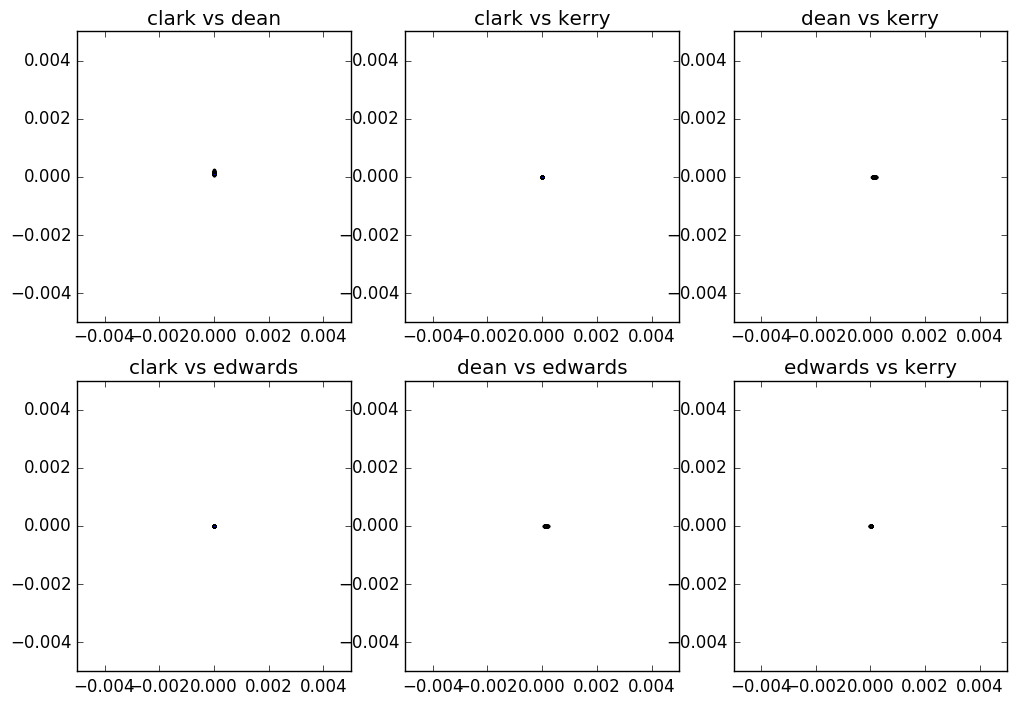

PyCall.PyObject_struct}) at ./deprecated.jl:770
 in transpose_f!(::Base.#transpose, ::Array{Ptr{PyCall.PyObject_struct},2}, ::Array{Ptr{PyCall.PyObject_struct},2}) at ./arraymath.jl:369
 in transpose(::Array{Ptr{PyCall.PyObject_struct},2}) at ./arraymath.jl:407
 in copy(::PyCall.PyArray{Ptr{PyCall.PyObject_struct},2}) at /Users/susu/.julia/v0.5/PyCall/src/numpy.jl:337
 in convert(::Type{Array{Ptr{PyCall.PyObject_struct},N}}, ::PyCall.PyObject) at /Users/susu/.julia/v0.5/PyCall/src/numpy.jl:453
 in convert(::Type{Array{PyCall.PyObject,N}}, ::PyCall.PyObject) at /Users/susu/.julia/v0.5/PyCall/src/numpy.jl:484
 in (::PyCall.##8#9{DataType,PyCall.PyObject})(::Int64) at /Users/susu/.julia/v0.5/PyCall/src/conversions.jl:180
 in ntuple(::PyCall.##8#9{DataType,PyCall.PyObject}, ::Int64) at ./tuple.jl:65
 in convert(::Type{Tuple{PyPlot.Figure,Array{PyCall.PyObject,N}}}, ::PyCall.PyObject) at /Users/susu/.julia/v0.5/PyCall/src/conversions.jl:180
 in convert(::Type{PyCall.PyAny}, ::PyCall.PyObjec

In [4]:
# 第1引数がstate_number
# 第2引数がsimulated votehare
# どちらの引数も省略することが可能。
# 第1引数を省略するとすべての州についてのプロットを別々のファイルにして出力する。
# 第2引数を省略すると上のsimulate関数を実行してvote shareを糧に出してくれる。
candcand(m, 4, v)

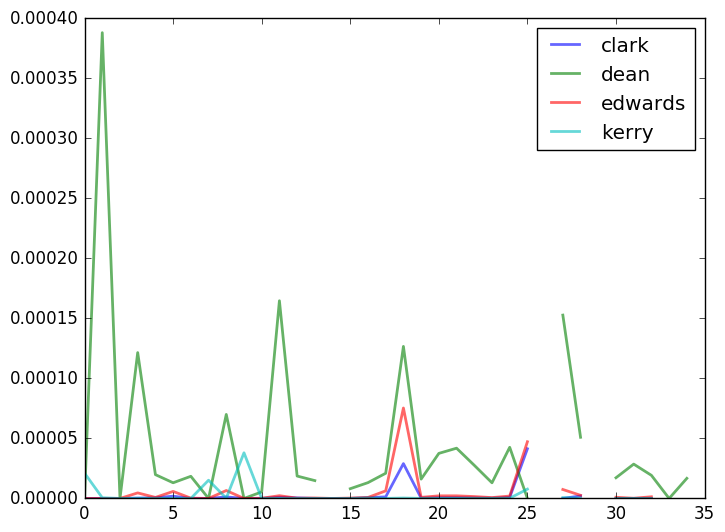

In [5]:
# vはsimulated vote share
# 省略可能。
# 省略したら勝手にsimulateしてvote shareを入れてくれる。
state_vote(m, v)

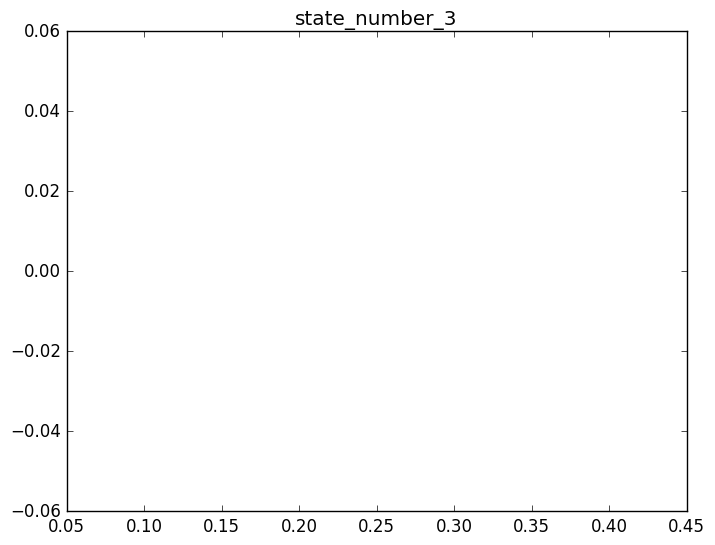

In [6]:
# demographicの種類は省略不可能
# 第3引数はstate number。上と同様に省略可能
# 第4引数はsimulated vote share。上と同様に省略可能
demo(m, "race", 3, v)

## 追加で確認

- Candidateのdemographic parameter に大きい値を入れてみる。値を大きくしたcandidateのvote shareが高まるかを確認
- Costのparameter を大きくすることでturn outがどれだけ上がるかを確認
- Tijを州ごとにパッと見れるようにする（表形式かな）

In [1]:
include("simulation.jl")

demo (generic function with 3 methods)

In [2]:
para = rand(273)

273-element Array{Float64,1}:
 0.315569  
 0.531422  
 0.559258  
 0.220042  
 0.142806  
 0.563612  
 0.851154  
 0.145462  
 0.00616329
 0.952264  
 0.0835791 
 0.213481  
 0.170298  
 ⋮         
 0.200197  
 0.272558  
 0.447169  
 0.559816  
 0.148882  
 0.968651  
 0.561127  
 0.418023  
 0.796836  
 0.350245  
 0.038493  
 0.217712  

In [4]:
para[12:27]

16-element Array{Float64,1}:
 0.213481 
 0.170298 
 0.880007 
 0.301092 
 0.695471 
 0.960148 
 0.788224 
 0.647675 
 0.217085 
 0.126979 
 0.863092 
 0.401108 
 0.200669 
 0.867198 
 0.0979124
 0.198588 

### 一つ目
### 確かに得票率が上がる

In [9]:
# vk = param[12:27]がdemographic

# 一番左の候補者についてパラメータをいじる
para[12:15]　= rand(4) .* 5

4-element Array{Float64,1}:
 3.42253
 2.49702
 2.20335
 1.69537

In [10]:
para[12:27]

16-element Array{Float64,1}:
 3.42253  
 2.49702  
 2.20335  
 1.69537  
 0.695471 
 0.960148 
 0.788224 
 0.647675 
 0.217085 
 0.126979 
 0.863092 
 0.401108 
 0.200669 
 0.867198 
 0.0979124
 0.198588 

In [11]:
m = simulation(para)

simulation([0.315569,0.531422,0.559258,0.220042,0.142806,0.563612,0.851154,0.145462,0.00616329,0.952264  …  0.447169,0.559816,0.148882,0.968651,0.561127,0.418023,0.796836,0.350245,0.038493,0.217712])

In [12]:
v = simulate(m)

full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in 'qbeta'
full precision may not have been achieved in '

3020×4 Array{Float64,2}:
 0.0       0.0         0.0          0.642372   
 0.0       0.0         0.0          0.640761   
 0.0       0.0         0.0          0.655733   
 0.0       0.0         0.0          0.631773   
 0.0       0.0         0.0          0.658219   
 0.0       0.0         0.0          0.616463   
 0.0       0.0         0.0          0.620499   
 0.0       0.0         0.0          0.665353   
 0.0       0.0         0.0          0.658165   
 0.0       0.0         0.0          0.642519   
 0.0       0.0         0.0          0.657222   
 0.0       0.0         0.0          0.735526   
 0.0       0.0         0.0          0.810236   
 ⋮                                             
 0.981751  9.93207e-8  1.13946e-9   3.82428e-10
 0.987442  2.0954e-7   8.9483e-9    1.71252e-9 
 0.984045  5.74748e-7  1.06507e-8   1.2621e-9  
 0.987999  1.03104e-6  2.16461e-8   7.42701e-9 
 0.984986  1.42347e-7  3.0246e-9    1.07366e-10
 0.976967  1.54806e-7  2.52708e-9   9.49481e-10
 0.982842  4.84

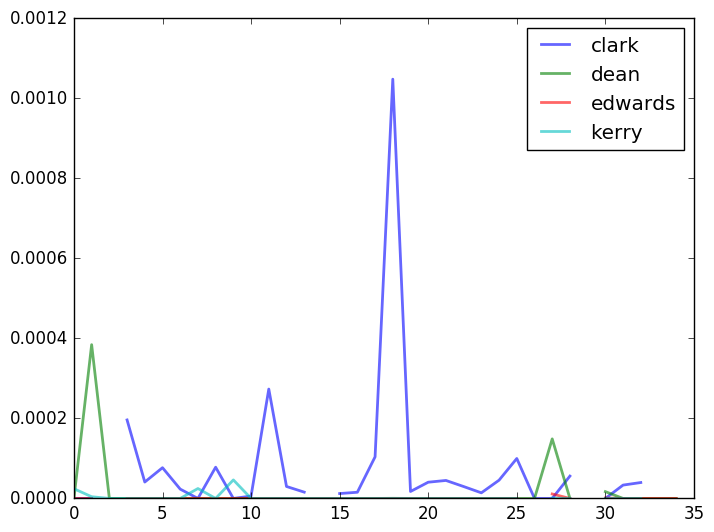

In [21]:
state_vote(m, v)

元データのVote_shareも横に足して1になるわけではないので注意

In [16]:
S = 1
DeltaO  = 0.6891
DeltaMO = 0.5366
DELTA = DeltaO*Open+DeltaMO*MOpen
RTOT = RDemHat.*(1+DELTA)-VOther
RTot_s = RTOT[Cand[S, 14]:Cand[S, 15], :]
RTot_s = max(RTot_s, sum(Votes[Cand[S, 14]:Cand[S, 15], :], 2))
Votes_s = Votes[Cand[S, 14]:Cand[S, 15], :]./(RTot_s*ones(1,4))

67×4 Array{Float64,2}:
 0.0  0.0  0.0  0.0293474
 0.0  0.0  0.0  0.0245562
 0.0  0.0  0.0  0.10277  
 0.0  0.0  0.0  0.0662702
 0.0  0.0  0.0  0.0268016
 0.0  0.0  0.0  0.170654 
 0.0  0.0  0.0  0.125789 
 0.0  0.0  0.0  0.0321643
 0.0  0.0  0.0  0.0441583
 0.0  0.0  0.0  0.151911 
 0.0  0.0  0.0  0.0220442
 0.0  0.0  0.0  0.223556 
 0.0  0.0  0.0  0.127786 
 ⋮                       
 0.0  0.0  0.0  0.100147 
 0.0  0.0  0.0  0.0783342
 0.0  0.0  0.0  0.0211082
 0.0  0.0  0.0  0.0213118
 0.0  0.0  0.0  0.208295 
 0.0  0.0  0.0  0.0319221
 0.0  0.0  0.0  0.0810185
 0.0  0.0  0.0  0.0546729
 0.0  0.0  0.0  0.136288 
 0.0  0.0  0.0  0.187591 
 0.0  0.0  0.0  0.199445 
 0.0  0.0  0.0  0.0138947

## 　二つ目

In [ ]:
# q = 4 Cx = param[1:q] Cz = -abs(param[q+1:q+3])が選挙のコスト


q = 4
para = rand(273)
para[1:q] = 
para[q+1:q+3] = 